# Libs and stuff

In [0]:
!free

              total        used        free      shared  buff/cache   available
Mem:       26753328      644816    23974776         900     2133736    25739208
Swap:             0           0           0


In [0]:
import gym
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
pwd

'/content'

In [0]:
from zipfile import ZipFile 
zipfile = '/gdrive/My Drive/datadays2020_contest_public_dataset.zip'

with ZipFile(zipfile, 'r') as zipfile: 
    zipfile.extractall()

In [0]:
import os

In [0]:
cd datadays2020_contest_public_dataset

/content/datadays2020_contest_public_dataset


In [0]:
csvs = os.listdir()

In [0]:
for l in list(enumerate(csvs)):
  print(l)

(0, 'ad.csv')
(1, 'event.csv')
(2, 'ad_image.csv')
(3, 'user_page_view.csv')
(4, 'click_test.csv')
(5, 'ad_title.csv')
(6, 'page.csv')
(7, 'page_topic.csv')
(8, 'click_train.csv')


In [0]:
user_page_view=pd.read_csv('user_page_view.csv')
click_train=pd.read_csv('click_train.csv')
ad_image=pd.read_csv('ad_image.csv')
ad=pd.read_csv('ad.csv')
page=pd.read_csv('page.csv')
ad_title=pd.read_csv('ad_title.csv')
event=pd.read_csv('event.csv')
page_topic=pd.read_csv('page_topic.csv')
click_test=pd.read_csv('click_test.csv')

In [0]:
from datetime import datetime
def timestamp2date(timestamp):
  return datetime.fromtimestamp(timestamp/1000)

# Datasets

In [0]:
page_topic['pageId'].nunique()

7025818

In [0]:
page_topic['topicId'].nunique()

50

In [0]:
page_topic.groupby('')

In [0]:
page_topic

,pageId,topicId,confidence
0,10743259,37,0.497099
1,10743259,23,0.016994
2,10743259,10,0.371499
3,10743259,4,0.105349
4,10743258,33,0.245752
...,...,...,...
28118751,4,0,0.152082
28118752,3,45,0.973528
28118753,3,35,0.019242
28118754,1,46,0.572883


In [0]:
t4.merge(page_topic)

In [0]:
event

,displayId,timestamp,pageId,widgetId,userId,device,OS,browser
0,4706262,1578429005696,3543873,6262,2688642,0,0,0
1,4706267,1578429007726,6245475,607,2688641,1,3,0
2,4706260,1578429012060,4416499,11458,2688638,0,0,1
3,4706255,1578429017218,6246028,9358,1962852,0,0,0
4,4706256,1578429021388,5327047,9358,2687719,0,0,0
...,...,...,...,...,...,...,...,...
1083066,243935,1579984124711,104462,12551,44,0,0,0
1083067,243775,1579984124711,104462,12551,44,0,0,0
1083068,243745,1579984124711,104462,12551,44,0,0,0
1083069,243931,1579984145239,10506468,6951,30,0,0,0


In [0]:
click_train.merge(page_topic,how='inner')

In [0]:
t3=click_train.merge(event,how='inner')

In [0]:
t3_merged = t3.merge(page_topic)

In [0]:
page_topic['topicId'].nunique()

50

In [0]:
page_topic.groupby('topicId')

In [0]:
print(page_topic['topicId'].nunique())
print(page_topic['pageId'].nunique())

50
7025818


In [0]:
t3_merged = t3_merged[['displayId','adId','pageId','topicId','confidence']]

In [0]:
t3_merged.drop_duplicates(inplace=True)

In [0]:
t3_merged.iloc[:1000].sort_values('confidence',ascending=False).groupby(['displayId','adId']).

pageId  topicId  confidence
displayId adId                               
1210227   535   420857.0     19.0    0.093549
          7125  420857.0     19.0    0.093549
          7174  420857.0     19.0    0.093549
          7181  420857.0     19.0    0.093549
          7182  420857.0     19.0    0.093549
...                  ...      ...         ...
4370693   535      619.0     28.0    0.272407
4608651   535      619.0     28.0    0.272407
4629026   535      619.0     28.0    0.272407
4633019   535      619.0     28.0    0.272407
4633233   535      619.0     28.0    0.272407

[325 rows x 3 columns]

In [0]:
t3_merged.columns

Index(['displayId', 'adId', 'clicked', 'timestamp', 'pageId', 'widgetId',
       'userId', 'device', 'OS', 'browser', 'topicId', 'confidence'],
      dtype='object')

In [0]:
tha = t3_merged.iloc[:1000].groupby(['displayId','adId']).apply(lambda x: (x.sort_values(['confidence'],ascending=False)))

In [0]:
t3_merged.iloc[:1000].sort_values(by = 'confidence',ascending = False).groupby(['displayId','adId']).agg({
    'timestamp':'quantile',
    'pageId':'quantile',
    'widgetId':'quantile',
    'userId':'quantile',
    'confidence':'max',
    'topicId':'first'}).drop_duplicates()

,displayId,adId,clicked,timestamp,pageId,widgetId,userId,device,OS,browser,topicId,confidence
141,3059296,6253,0,1578985669562,14086,6167,1820084,0,0,0,15,0.782896
149,3124933,5715,0,1578969503331,14086,11454,1322645,0,0,0,15,0.782896
153,3251866,25,0,1578917910989,14086,11454,1925606,0,0,0,15,0.782896
155,3251866,3652,0,1578917910989,14086,11454,1925606,0,0,0,15,0.782896
157,3314296,165,0,1578901034299,14086,6167,1959642,0,0,0,15,0.782896
...,...,...,...,...,...,...,...,...,...,...,...,...
14,1210227,7125,0,1579598863403,420857,9519,782749,0,0,1,9,0.019889
22,1210227,7181,0,1579598863403,420857,9519,782749,0,0,1,9,0.019889
6,1210227,7182,0,1579598863403,420857,9519,782749,0,0,1,9,0.019889
30,1210227,535,0,1579598863403,420857,9519,782749,0,0,1,9,0.019889


In [0]:
tha.reset_index(level = 0)

ValueError: ignored

In [0]:
ad_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3256 entries, 0 to 3255
Data columns (total 2 columns):
adId             3256 non-null int64
imageFeatures    3256 non-null object
dtypes: int64(1), object(1)
memory usage: 51.0+ KB


In [0]:
ad_title['adId'].nunique()

3252

#Test Dataset (Run)

In [0]:
##Check wehther there are missing adIds
adIdunq = ad_title['adId'].unique()
missing_wordIds = np.append(np.setdiff1d(click_test['adId'].unique(),adIdunq),np.setdiff1d(click_train['adId'].unique(),adIdunq))
missing_wordIds = pd.DataFrame(data = {
    'adId':missing_wordIds,
    'wordId':0
})
ad_title = ad_title.append(missing_wordIds,ignore_index=True)
ad_title = ad_title.groupby('adId').agg({'wordId':'count'}).reset_index()
del adIdunq,missing_wordIds

In [0]:
ad_title.rename(columns = {'wordId':'wordIdcount'},inplace = True)

In [0]:
f1=click_test.merge(event,how='inner')
f2=f1.merge(page,how='inner')
f3=f2.merge(ad,how='inner')

In [0]:
f4 = f3.merge(ad_title,how='inner')

In [0]:
from datetime import datetime
def timestamp2date(timestamp):
  return datetime.fromtimestamp(timestamp/1000)

f4['timestamp']=f4['timestamp'].apply(timestamp2date)
f4['Month'] = f4['timestamp'].dt.month
f4['Day of the month'] = f4['timestamp'].dt.day
f4["Day of the week"] = f4['timestamp'].dt.dayofweek
f4['Hour'] = f4['timestamp'].dt.hour
f4 = f4.drop(['timestamp'], axis=1)

In [0]:
f4 = f4.groupby(['displayId','adId']).first().reset_index()

In [0]:
f4

,displayId,adId,pageId,widgetId,userId,device,OS,browser,website,publisher,campaignId,advertiserId,wordIdcount,Month,Day of the month,Day of the week,Hour
0,151650,6257,4095035,8107,10279,1,1,7,4600,1098,1083,4726,3,1,25,5,18
1,151650,6690,4095035,8107,10279,1,1,7,4600,1098,2911,6040,5,1,25,5,18
2,151650,7585,4095035,8107,10279,1,1,7,4600,1098,2292,7762,4,1,25,5,18
3,151938,123,4273336,10142,17723,1,1,0,13,12,683,6698,4,1,25,5,17
4,151938,6690,4273336,10142,17723,1,1,0,13,12,2911,6040,5,1,25,5,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199043,1328957,7039,9377622,3145,513696,0,0,0,19,18,471,5528,7,1,21,1,9
1199044,1328976,535,8693057,6262,781785,0,0,4,11,10,3186,1419,4,1,21,1,9
1199045,1328976,7167,8693057,6262,781785,0,0,4,11,10,3186,1419,4,1,21,1,9
1199046,1328976,7174,8693057,6262,781785,0,0,4,11,10,471,5528,5,1,21,1,9


# Train Dataset (Run)

In [0]:
t3=click_train.merge(event,how='inner')
t3=t3.merge(page,how='inner')
t3=t3.merge(ad,how='inner')
t4=t3.merge(ad_title,how='inner')
del t3

In [0]:
t4

,displayId,adId,clicked,timestamp,pageId,widgetId,userId,device,OS,browser,website,publisher,campaignId,advertiserId,wordIdcount
0,1210227,7182,0,1579598863403,420857,9519,782749,0,0,1,477,49,3402,7579,5
1,1248098,7182,0,1579595840497,619,6167,791563,0,2,2,18,17,3402,7579,5
2,1271266,7182,1,1579595490529,11611,12678,792543,0,0,1,69,66,3402,7579,5
3,1285917,7182,1,1579596863199,163,10142,788614,0,0,0,13,12,3402,7579,5
4,1336598,7182,1,1579597467698,163,10142,786811,0,0,1,13,12,3402,7579,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3642239,4658083,4433,0,1578451785227,6253310,12487,1025974,1,1,0,15,14,1792,9424,4
3642240,4485064,5224,0,1578496280410,6404608,12676,2382857,0,0,1,5,3,1337,3043,6
3642241,4631262,5373,1,1578457919467,6239561,8257,258536,0,0,0,5,3,1337,3043,4
3642242,4631231,5373,0,1578457755488,6162861,8257,2253915,0,0,10,5,3,1337,3043,4


In [0]:
from datetime import datetime
def timestamp2date(timestamp):
  return datetime.fromtimestamp(timestamp/1000)

t4['timestamp']=t4['timestamp'].apply(timestamp2date)
t4['Month'] = t4['timestamp'].dt.month
t4['Day of the month'] = t4['timestamp'].dt.day
t4["Day of the week"] = t4['timestamp'].dt.dayofweek
t4['Hour'] = t4['timestamp'].dt.hour
t4 = t4.drop(['timestamp'], axis=1)

In [0]:
t4

,displayId,adId,clicked,pageId,widgetId,userId,device,OS,browser,website,publisher,campaignId,advertiserId,wordIdcount,Month,Day of the month,Day of the week,Hour
0,1210227,7182,0,420857,9519,782749,0,0,1,477,49,3402,7579,5,1,21,1,9
1,1248098,7182,0,619,6167,791563,0,2,2,18,17,3402,7579,5,1,21,1,8
2,1271266,7182,1,11611,12678,792543,0,0,1,69,66,3402,7579,5,1,21,1,8
3,1285917,7182,1,163,10142,788614,0,0,0,13,12,3402,7579,5,1,21,1,8
4,1336598,7182,1,163,10142,786811,0,0,1,13,12,3402,7579,5,1,21,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3642239,4658083,4433,0,6253310,12487,1025974,1,1,0,15,14,1792,9424,4,1,8,2,2
3642240,4485064,5224,0,6404608,12676,2382857,0,0,1,5,3,1337,3043,6,1,8,2,15
3642241,4631262,5373,1,6239561,8257,258536,0,0,0,5,3,1337,3043,4,1,8,2,4
3642242,4631231,5373,0,6162861,8257,2253915,0,0,10,5,3,1337,3043,4,1,8,2,4


#DisplayId Approach

In [0]:
def desdf(df):
  print(f'The length of this df is {len(df)}')
  for col in df:
    print(f'There are {df[col].nunique()} unique values in {col}.')

In [0]:
click_train['displayId'].nunique()

812303

In [0]:
click_train.groupby('displayId').clicked.agg(['count','mean']).describe()

,count,mean
count,812303.000000,812303.000000
mean,4.483849,0.262622
std,1.813131,0.110758
min,2.000000,0.041667
25%,3.000000,0.166667
50%,4.000000,0.250000
75%,6.000000,0.333333
max,24.000000,0.500000


In [0]:
displayId_new = t4[['displayId','pageId','widgetId','userId','device','OS','browser','website','publisher','Day of the week','Hour']].copy().drop_duplicates()

In [0]:
displayId_new

,displayId,pageId,widgetId,userId,device,OS,browser,website,publisher,Day of the week,Hour
0,1210227,420857,9519,782749,0,0,1,477,49,1,9
1,1248098,619,6167,791563,0,2,2,18,17,1,8
2,1271266,11611,12678,792543,0,0,1,69,66,1,8
3,1285917,163,10142,788614,0,0,0,13,12,1,8
4,1336598,163,10142,786811,0,0,1,13,12,1,9
...,...,...,...,...,...,...,...,...,...,...,...
3641384,4567694,209117,12609,2618055,0,0,1,58,57,2,9
3641624,2283234,81447,10385,1367189,0,0,0,102,97,4,17
3642155,3245238,55590,10896,1921893,0,0,0,296,260,0,12
3642183,3282134,41139,12940,1942517,0,0,5,320,284,0,9


In [0]:
desdf(displayId_new)

The length of this df is 812303
There are 812303 unique values in displayId.
There are 151723 unique values in pageId.
There are 1159 unique values in widgetId.
There are 646440 unique values in userId.
There are 4 unique values in device.
There are 7 unique values in OS.
There are 75 unique values in browser.
There are 2858 unique values in website.
There are 757 unique values in publisher.
There are 7 unique values in Day of the week.
There are 24 unique values in Hour.


In [0]:
#userId : 646440
#pageId : 151723
displayId_new = displayId_new.drop(['userId','pageId'],axis = 1)

In [0]:
displayId_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 812303 entries, 0 to 3642184
Data columns (total 9 columns):
displayId          812303 non-null int64
widgetId           812303 non-null int64
device             812303 non-null int64
OS                 812303 non-null int64
browser            812303 non-null int64
website            812303 non-null int64
publisher          812303 non-null int64
Day of the week    812303 non-null int64
Hour               812303 non-null int64
dtypes: int64(9)
memory usage: 62.0 MB


In [0]:
temp = displayId_new.drop('displayId',axis = 1).astype('uint16')
temp2 = displayId_new['displayId']
displayId_new = pd.concat([temp2,temp],axis = 1)

In [0]:
displayId_new.head(0)

,displayId,widgetId,device,OS,browser,website,publisher,Day of the week,Hour


In [0]:
#Get dummies
dummy_wdg = pd.get_dummies(displayId_new['widgetId'],prefix = 'wdg',drop_first=True)
dummy_dev = pd.get_dummies(displayId_new['device'],'dev',drop_first=True)
dummy_OS = pd.get_dummies(displayId_new['OS'],'OS',drop_first=True)
dummy_brw = pd.get_dummies(displayId_new['browser'],'brw',drop_first=True)
dummy_web = pd.get_dummies(displayId_new['website'],'web',drop_first=True)
dummy_pub = pd.get_dummies(displayId_new['publisher'],'pub',drop_first=True)
dummy_day = pd.get_dummies(displayId_new['Day of the week'],'day',drop_first=True)
dummy_hr = pd.get_dummies(displayId_new['Hour'],'hr',drop_first=True)


In [0]:
displayId_new=pd.concat([temp2,dummy_wdg,dummy_dev,dummy_OS,dummy_brw,dummy_web,dummy_pub,dummy_day,dummy_hr])

# UserId

In [0]:
desdf(t4)

The length of this df is 3642244
There are 812303 unique values in displayId.
There are 2616 unique values in adId.
There are 2 unique values in clicked.
There are 151723 unique values in pageId.
There are 1159 unique values in widgetId.
There are 646440 unique values in userId.
There are 4 unique values in device.
There are 7 unique values in OS.
There are 75 unique values in browser.
There are 2858 unique values in website.
There are 757 unique values in publisher.
There are 463 unique values in campaignId.
There are 196 unique values in advertiserId.
There are 11 unique values in wordIdcount.
There are 1 unique values in Month.
There are 15 unique values in Day of the month.
There are 7 unique values in Day of the week.
There are 24 unique values in Hour.


In [0]:
t4[t4['userId'] == 782749]

,displayId,adId,clicked,pageId,widgetId,userId,device,OS,browser,website,publisher,campaignId,advertiserId,wordIdcount,Month,Day of the month,Day of the week,Hour
0,1210227,7182,0,420857,9519,782749,0,0,1,477,49,3402,7579,5,1,21,1,9
2437,1210227,7125,0,420857,9519,782749,0,0,1,477,49,251,5971,8,1,21,1,9
5151,1210227,7181,0,420857,9519,782749,0,0,1,477,49,3402,7579,5,1,21,1,9
7139,1210227,535,0,420857,9519,782749,0,0,1,477,49,3186,1419,4,1,21,1,9
53595,1210227,7174,1,420857,9519,782749,0,0,1,477,49,471,5528,5,1,21,1,9


In [0]:
t4.groupby('userId')['clicked'].agg(['mean','sum','count']).describe()

,mean,sum,count
count,646440.000000,646440.000000,646440.000000
mean,0.263495,1.256579,5.634311
std,0.108498,1.066758,6.340203
min,0.042553,1.000000,2.000000
25%,0.181818,1.000000,3.000000
50%,0.250000,1.000000,5.000000
75%,0.333333,1.000000,6.000000
max,0.500000,252.000000,1771.000000


In [0]:
t4.groupby('userId')['clicked'].agg(['mean','sum','count']).reset_index()

,userId,mean,sum,count
0,8,0.250000,1,4
1,60,0.333333,1,3
2,70,0.250000,1,4
3,79,0.285714,2,7
4,94,0.250000,1,4
...,...,...,...,...
646435,2688629,0.250000,1,4
646436,2688634,0.250000,1,4
646437,2688638,0.333333,1,3
646438,2688641,0.200000,1,5


In [0]:
t4.groupby('userId')['device','OS','browser'].quantile().reset_index()

,userId,device,OS,browser
0,8,0.0,0.0,0.0
1,60,0.0,0.0,0.0
2,70,1.0,1.0,0.0
3,79,0.0,0.0,0.0
4,94,0.0,0.0,0.0
...,...,...,...,...
646435,2688629,0.0,0.0,5.0
646436,2688634,0.0,0.0,0.0
646437,2688638,0.0,0.0,1.0
646438,2688641,1.0,3.0,0.0


In [0]:
X = pd.concat([t4.groupby('userId')['clicked'].agg(['mean','count']).reset_index(),t4.groupby('userId')['device','OS','browser'].quantile().reset_index().drop('userId',axis = 1)],axis =1)

In [0]:
y_train = X['mean']
X_train = X.drop('mean',axis = 1)

In [0]:
X_train

,userId,count,device,OS,browser
0,8,4,0.0,0.0,0.0
1,60,3,0.0,0.0,0.0
2,70,4,1.0,1.0,0.0
3,79,7,0.0,0.0,0.0
4,94,4,0.0,0.0,0.0
...,...,...,...,...,...
646435,2688629,4,0.0,0.0,5.0
646436,2688634,4,0.0,0.0,0.0
646437,2688638,3,0.0,0.0,1.0
646438,2688641,5,1.0,3.0,0.0


In [0]:
#GetDummies
dummy_OS = pd.get_dummies(X_train['OS'],prefix = 'OS',drop_first=True)
dummy_brw = pd.get_dummies(X_train['browser'],prefix = 'brw',drop_first=True)
dummy_dev = pd.get_dummies(X_train['device'],prefix = 'dev',drop_first=True)
dummy_Xtrain = pd.concat([X_train.drop(['OS','browser','device'],axis = 1),dummy_OS,dummy_brw,dummy_dev],axis = 1)

In [0]:
dummy_Xtrain

,userId,count,OS_0.5,OS_1.0,OS_1.5,OS_2.0,OS_2.5,OS_3.0,OS_4.0,OS_5.0,OS_6.0,brw_0.5,brw_1.0,brw_2.0,brw_2.5,brw_3.0,brw_3.5,brw_4.0,brw_5.0,brw_6.0,brw_6.5,brw_7.0,brw_7.5,brw_8.0,brw_9.0,brw_9.5,brw_10.0,brw_11.0,brw_12.0,brw_13.0,brw_14.0,brw_15.0,brw_16.0,brw_17.0,brw_18.0,brw_19.0,brw_20.0,brw_21.0,brw_22.0,brw_23.0,...,brw_44.0,brw_45.0,brw_46.0,brw_47.0,brw_48.0,brw_49.0,brw_50.0,brw_51.0,brw_52.0,brw_53.0,brw_56.0,brw_57.0,brw_59.0,brw_60.0,brw_61.0,brw_63.0,brw_66.0,brw_69.0,brw_70.0,brw_72.0,brw_74.0,brw_78.0,brw_80.0,brw_81.0,brw_83.0,brw_85.0,brw_87.0,brw_88.0,brw_90.0,brw_91.0,brw_93.0,brw_95.0,brw_97.0,brw_99.0,brw_102.0,dev_0.5,dev_1.0,dev_1.5,dev_2.0,dev_3.0
0,8,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,60,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,70,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,79,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,94,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646435,2688629,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
646436,2688634,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
646437,2688638,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
646438,2688641,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [0]:
lr = LinearRegression()

In [0]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
pr = lr.predict(X_test)

In [0]:
pr.mean()

0.2633657608520403

In [0]:
th = 0.5

In [0]:
pr[np.abs(pr)>0.9] = pr.mean()

In [0]:
mse(y_test,pr)

0.009470603445079252

In [0]:
mae(y_test,pr)

0.07711668580572142

In [0]:
plt.figure(figsize = (12,6))
sns.distplot(100*(y_test.values-pr),bins = 100)

# Getting to know the dataset

In [0]:
def desdf(df):
  print(f'The length of this df is {len(df)}')
  for col in df:
    print(f'There are {df[col].nunique()} unique values in {col}.')

In [0]:
ad=pd.read_csv('ad.csv')
ad_complete = ad.merge(ad_title)

In [0]:
desdf(ad_complete)

The length of this df is 3256
There are 3256 unique values in adId.
There are 528 unique values in campaignId.
There are 213 unique values in advertiserId.
There are 11 unique values in wordIdcount.


In [0]:
ad_title=pd.read_csv('ad_title.csv')

In [0]:
ad_complete

,adId,campaignId,advertiserId,wordIdcount
0,7867,5918,8414,5
1,7866,5918,8414,5
2,7865,5918,8414,5
3,7863,8343,8414,5
4,7862,8343,8414,7
...,...,...,...,...
3251,13,1402,3073,10
3252,11,4493,378,7
3253,8,4458,4187,7
3254,7,6471,5175,4


### bag of words

In [0]:
from tqdm import tqdm

In [0]:
allbag = []
adIds = []
for ad in tqdm(ad_title['adId'].unique()):
  adIds.append(ad)
  bag = ad_title[ad_title['adId']==ad]['wordId'].values
  allbag.append(bag)
  


100%|██████████| 3252/3252 [00:02<00:00, 1132.39it/s]


In [0]:
wordidunq = ad_title['wordId'].unique()

In [0]:
worddf = pd.DataFrame(0,index = adIds,columns = wordidunq)

In [0]:
allbag[0]

array([24, 25, 26, 27, 28, 29, 30, 31])

In [0]:
for adid in tqdm(adIds):
  for word in allbag[adIds.index(adid)]:
    worddf.loc[adid][word] = 1

100%|██████████| 3252/3252 [00:04<00:00, 714.80it/s]


In [0]:
worddf.head()

,24,25,26,27,28,29,30,31,32,33,34,35,8,36,37,38,39,40,50,51,52,53,54,55,56,61,62,63,64,65,66,67,68,69,70,9,11,12,13,14,...,2659,2660,2661,2662,2663,1946,2664,2665,1899,2666,2178,726,2667,1886,1940,2668,2669,2670,2671,1062,1351,2672,1227,1936,524,978,2674,483,2675,2676,2677,1697,2678,2679,2680,2681,2682,1965,2683,1861
6,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
worddf = worddf.reset_index().rename(columns = {'index':'adId'})

In [0]:
ad_complete = ad_complete.merge(worddf,how = 'left')

### The rest

In [0]:
ad_complete.fillna(0,inplace = True)

In [0]:
ad_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3256 entries, 0 to 3255
Data columns (total 4 columns):
adId            3256 non-null int64
campaignId      3256 non-null int64
advertiserId    3256 non-null int64
wordIdcount     3256 non-null int64
dtypes: int64(4)
memory usage: 127.2 KB


### Ad image

In [0]:
ad_image_copy = ad_image.copy()
n = 512
ad_image_copy['imageFeatures']=ad_image_copy['imageFeatures'].apply(lambda x:x[1:-1])
ad_image_copy['imageFeatures']=ad_image_copy['imageFeatures'].apply(lambda x:x.split(','))
ad_image_copy['imageFeatures']=ad_image_copy['imageFeatures'].apply(lambda x:x[0:n])
df=pd.DataFrame(index=range(0,3256))
for i in range(0,n):
  df[i]=ad_image_copy['imageFeatures'].apply(lambda x:float(x[i]))
#df = df.astype('float16')
df['adId'] =ad_image_copy['adId']

In [0]:
df = df.add_prefix('img').rename(columns = {'imgadId':'adId'})

In [0]:
ad_complete=ad_complete.merge(df)

###The rest

In [0]:
ad_complete

,adId,campaignId,advertiserId,wordIdcount,img0,img1,img2,img3,img4,img5,img6,img7,img8,img9,img10,img11,img12,img13,img14,img15,img16,img17,img18,img19,img20,img21,img22,img23,img24,img25,img26,img27,img28,img29,img30,img31,img32,img33,img34,img35,...,img472,img473,img474,img475,img476,img477,img478,img479,img480,img481,img482,img483,img484,img485,img486,img487,img488,img489,img490,img491,img492,img493,img494,img495,img496,img497,img498,img499,img500,img501,img502,img503,img504,img505,img506,img507,img508,img509,img510,img511
0,7867,5918,8414,5,0.052459,0.000000,0.042624,0.333583,0.383563,0.001634,0.344869,0.525469,0.053760,0.079034,0.500915,0.677032,0.000000,0.047452,0.113147,0.007646,0.000000,0.150139,0.032419,0.004933,0.000000,0.000000,0.573060,0.019596,0.000000,0.092233,0.025148,0.072606,0.000000,0.537699,0.000000,0.154060,0.955965,0.105462,0.003840,0.000000,...,0.000000,0.000000,1.014188,0.149694,0.106801,0.168865,0.019656,0.081902,0.339181,0.134276,0.016473,0.193523,0.409411,0.127201,0.406103,0.000000,0.000000,0.007431,0.295453,0.348585,0.112800,0.000000,0.281564,0.044966,0.145961,0.000000,0.144654,0.090878,0.076503,0.223643,0.233728,0.539480,0.152508,0.344518,0.778731,0.078295,0.160162,0.000000,0.305145,0.018119
1,7866,5918,8414,5,0.003216,0.144424,0.000149,0.246036,0.133644,0.000000,0.915359,0.494597,0.000000,0.244905,0.000000,0.285869,0.010935,0.193851,0.123908,0.000000,0.001576,0.479430,0.099850,0.397035,0.000000,0.083739,0.365803,0.000000,0.000000,0.368738,0.038240,0.530159,0.035848,0.759484,0.000000,0.387569,0.231120,0.000000,0.000000,0.048897,...,0.164679,0.000000,1.067591,0.321311,0.061691,0.549251,0.720629,0.396768,0.056078,0.066055,0.000000,0.090988,0.282183,0.111141,1.165328,0.000000,0.000000,0.017706,0.000000,0.170955,0.649390,0.097097,0.025450,0.087521,0.186865,0.039025,0.185869,0.285500,0.218107,0.274950,0.024028,0.429552,0.124412,0.884689,0.471237,0.018215,0.321597,0.000000,0.471502,0.000000
2,7865,5918,8414,5,0.027210,0.000000,0.513353,0.295720,0.378193,0.000000,0.826202,0.000000,0.000000,0.478022,0.000000,0.198038,0.000000,0.048585,0.158298,0.000000,0.000000,0.010905,0.558909,0.000046,0.282498,0.003930,0.228165,0.000000,0.000000,0.006795,0.000000,0.025838,0.049386,0.005479,0.020980,0.034951,0.007829,0.000000,0.160475,0.326603,...,0.000000,0.068351,0.154729,0.146158,0.121083,0.388153,0.012747,0.032252,0.178170,0.013783,0.092282,0.000000,0.450477,0.000000,0.145015,0.027514,0.032839,0.077635,0.276253,0.000000,0.053453,0.090740,0.030008,0.126381,0.360875,0.000000,0.000000,0.000000,0.696031,0.000000,0.121223,0.076248,0.206134,1.364922,0.007159,0.022398,0.492233,0.010553,0.398881,0.298406
3,7863,8343,8414,5,0.001398,0.000000,0.000000,0.045557,0.264038,0.028482,0.504099,0.000000,0.367462,0.260327,0.952236,0.010145,0.000000,0.018427,0.035838,0.077275,0.051724,0.000000,0.000000,0.022899,0.055368,0.000000,0.672315,0.247884,0.000000,0.213115,0.012865,0.110544,0.041787,0.016642,0.000000,0.000000,0.203766,0.000000,0.589644,0.006881,...,0.000000,0.000000,0.375304,0.624594,0.210937,0.000000,0.010062,0.611074,0.122029,0.001733,0.002104,0.591954,0.335787,0.038882,0.022314,0.000000,0.004440,0.000000,0.157664,0.000000,0.004445,0.006612,0.266050,0.500539,0.368841,0.000000,0.199298,0.000000,0.002193,0.527535,0.012589,0.583795,0.102440,1.093687,0.395305,0.295513,0.070853,0.209269,0.523830,0.000000
4,7862,8343,8414,7,0.024268,0.026082,0.226017,0.023072,0.490081,0.004264,0.871454,0.002935,0.361995,1.318446,0.184377,0.000000,0.000000,0.251946,1.076047,0.099979,0.000000,0.000000,0.005898,0.042946,0.023711,0.003651,1.057478,0.000000,0.000000,0.030528,0.042976,0.024609,0.013708,0.302596,0.000000,0.000000,0.000000,0.000000,0.029792,0.000000,...,0.000000,0.000000,0.030980,0.173166,0.264131,0.000000,0.000000,0.000000,0.683521,0.224810,0.000000,0.009392,0.331893,0.022459,0.079805,0.000000,0.000000,0.000000,0.007280,0.072862,0.067438,0.000000,0.056954,0.000000,0.286929,0.015094,0.659791,0.000000,0.000000,0.071884,0.054965,1.150031,0.008

## Different CTR

In [0]:
#Correcting the wordid
click_test=pd.read_csv('click_test.csv')
click_train=pd.read_csv('click_train.csv')
ad_title=pd.read_csv('ad_title.csv')
adIdunq = ad_title['adId'].unique()
missing_wordIds = np.append(np.setdiff1d(click_test['adId'].unique(),adIdunq),np.setdiff1d(click_train['adId'].unique(),adIdunq))
missing_wordIds = pd.DataFrame(data = {
    'adId':missing_wordIds,
    'wordId':0
})
ad_title = ad_title.append(missing_wordIds,ignore_index=True)
ad_title = ad_title.groupby('adId').agg({'wordId':'count'}).reset_index()
del adIdunq,missing_wordIds
ad_title.rename(columns = {'wordId':'wordIdcount'},inplace = True)

In [0]:
ad=pd.read_csv('ad.csv')
#ad_title=pd.read_csv('ad_title.csv')
ad_image=pd.read_csv('ad_image.csv')
ad_complete = ad.merge(ad_title)

In [0]:
ad_image_copy = ad_image.copy()
n = 512
ad_image_copy['imageFeatures']=ad_image_copy['imageFeatures'].apply(lambda x:x[1:-1])
ad_image_copy['imageFeatures']=ad_image_copy['imageFeatures'].apply(lambda x:x.split(','))
ad_image_copy['imageFeatures']=ad_image_copy['imageFeatures'].apply(lambda x:x[0:n])
df=pd.DataFrame(index=range(0,3256))
for i in range(0,n):
  df[i]=ad_image_copy['imageFeatures'].apply(lambda x:float(x[i]))
#df = df.astype('float16')
df['adId'] =ad_image_copy['adId']
df = df.add_prefix('img').rename(columns = {'imgadId':'adId'})

In [0]:
#Run only if you want to add the 512 img features

#
#           Important
#
#


ad_complete = ad_complete.merge(df,on = 'adId')

In [0]:
#GetDummies
train_adId_unq = click_train['adId'].unique()
test_adId_unq = click_test['adId'].unique()
unq_adId = np.unique(np.append(train_adId_unq,test_adId_unq))
unq_adId = pd.DataFrame(data = {'adId':unq_adId})

unq_adId = unq_adId.merge(ad_complete)

dummy_cmp = pd.get_dummies(unq_adId['campaignId'],prefix = 'CpgId',drop_first=True)
dummy_advertiser = pd.get_dummies(unq_adId['advertiserId'],prefix = 'adr',drop_first=True)
unq_adId = pd.concat([unq_adId.drop(['campaignId','advertiserId'],axis = 1),dummy_cmp,dummy_advertiser],axis = 1)


In [0]:
#Simply the mean
click_percentage = click_train.groupby('adId').agg({'clicked':'mean'}).reset_index()
click_percentage.rename(columns = {'clicked':'clicked mean'},inplace = True)
click_count      = click_train.groupby('adId').agg({'clicked':'count'}).reset_index()
click_count.rename(columns = {'clicked':'clicked count'},inplace = True)
th = 5
click_count = click_count.merge(click_percentage)
train_no_data = click_count[click_count['clicked count']<th]
train_yes_data = click_count[click_count['clicked count']>=th]

train_eval_yes_data = click_count

X = train_yes_data.merge(unq_adId,on = 'adId')
X_e = train_eval_yes_data.merge(unq_adId,on = 'adId')

X_test = click_test.groupby('adId').agg('count').reset_index()
X_test.rename(columns = {'displayId':'clicked count'},inplace = True)
X_test = X_test.merge(unq_adId)

y = X['clicked mean']
X = X.drop('clicked mean',axis = 1)
X_e = X_e.drop('clicked mean',axis = 1)
X_eval = X_e.append(X_test).groupby('adId').first().reset_index().copy()

In [0]:
#Likelihood
train=pd.read_csv('click_train.csv',usecols=['adId', 'clicked'])
ad_train_likelihood = train.groupby('adId')['clicked'].agg(['count', 'sum', 'mean']).reset_index()
M = train.clicked.mean()
del train
click_count      = click_train.groupby('adId').agg({'clicked':'count'}).reset_index()
click_count.rename(columns = {'clicked':'clicked count'},inplace = True)

click_count_test      = click_train.groupby('adId').agg({'clicked':'count'}).reset_index()
click_count_test.rename(columns = {'clicked':'clicked count'},inplace = True)

ad_train_likelihood['clicked mean'] = (ad_train_likelihood['sum'] + 12*M) / (12 + ad_train_likelihood['count'])#Actually likelihood
ad_train_likelihood.drop(['sum','mean'],axis = 1,inplace = True)
train_yes_data = ad_train_likelihood
X = train_yes_data.merge(unq_adId,on = 'adId')
X.rename(columns = {'count':'clicked count'},inplace = True)

X_test = click_test.groupby('adId').agg('count').reset_index()
X_test.rename(columns = {'displayId':'clicked count'},inplace = True)
X_test = X_test.merge(unq_adId)

y = X['clicked mean']
X = X.drop('clicked mean',axis = 1)

X_eval = X.append(X_test).groupby('adId').first().reset_index().copy()

In [0]:
#IMDB
minimum_count = 100  #m
click_percentage = click_train.groupby('adId').agg({'clicked':'mean'}).reset_index() #R
click_percentage.rename(columns = {'clicked':'clicked mean'},inplace = True)
mean_of_all = click_percentage['clicked mean'].mean() #C
click_count      = click_train.groupby('adId').agg({'clicked':'count'}).reset_index() #V
click_count.rename(columns = {'clicked':'clicked count'},inplace = True)

weighted_rate = (click_count['clicked count'] * click_percentage['clicked mean'] + minimum_count * mean_of_all) / (click_count['clicked count'] + minimum_count)
weighted_rate = pd.DataFrame(data = {'adId':click_count['adId'],'clicked count': click_count['clicked count'] ,'clicked mean':weighted_rate})
X = weighted_rate.merge(unq_adId,on = 'adId')

X_test = click_test.groupby('adId').agg('count').reset_index()
X_test.rename(columns = {'displayId':'clicked count'},inplace = True)
X_test = X_test.merge(unq_adId)

y = X['clicked mean']
X = X.drop('clicked mean',axis = 1)

X_eval = X.append(X_test).groupby('adId').first().reset_index().copy()

In [0]:
from sklearn.model_selection import train_test_split

#for main use dont run
#X, X_t, y, y_t = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
try : del lr
except : pass
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

lr = LinearRegression()
lr.fit(X,y)
pr = lr.predict(X)

In [0]:
mae(pr,y)

0.03816518905154075

In [0]:
mse(pr,y)

0.0027418515028301413

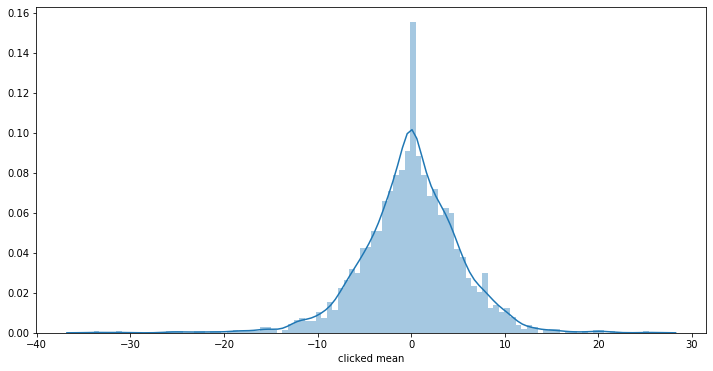

In [0]:
plt.figure(figsize = (12,6))
sns.distplot(100*(pr-y),bins = 100)

In [0]:
pr_all = lr.predict(X_eval)

In [0]:
len(pr_all)

3256

In [0]:
X_eval['clicked mean'] = pr_all
X_eval = X_eval[['adId','clicked mean']]

In [0]:
X_eval.to_csv('ctr512.csv')

## LR and nn for ctr prediction using adId features

In [0]:
#Click Rate
click_percentage = click_train.groupby('adId').agg({'clicked':'mean'}).reset_index()
click_percentage.rename(columns = {'clicked':'clicked mean'},inplace = True)
click_count      = click_train.groupby('adId').agg({'clicked':'count'}).reset_index()
click_count.rename(columns = {'clicked':'clicked count'},inplace = True)
th = 8
click_count = click_count.merge(click_percentage)
train_no_data = click_count[click_count['clicked count']<th]
train_yes_data = click_count[click_count['clicked count']>=th]

In [0]:
#Likelihood
train=pd.read_csv('click_train.csv',usecols=['adId', 'clicked'])
ad_train_likelihood = train.groupby('adId')['clicked'].agg(['count', 'sum', 'mean']).reset_index()
M = train.clicked.mean()
del train
click_count      = click_train.groupby('adId').agg({'clicked':'count'}).reset_index()
click_count.rename(columns = {'clicked':'clicked count'},inplace = True)
ad_train_likelihood['clicked mean'] = (ad_train_likelihood['sum'] + 12*M) / (12 + ad_train_likelihood['count'])#Actually likelihood
ad_train_likelihood.drop(['sum','mean'],axis = 1,inplace = True)
train_yes_data = ad_train_likelihood
X = train_yes_data.merge(ad_complete,on = 'adId')

In [0]:
train_yes_data.max()

adId             7182.000000
count           67562.000000
clicked mean        0.635584
dtype: float64

In [0]:
train_yes_data

,adId,count,clicked mean
0,6,22691,0.306025
1,7,4783,0.127774
2,8,10403,0.236743
3,11,3501,0.119179
4,13,2442,0.152680
...,...,...,...
2611,7177,68,0.283453
2612,7178,448,0.190601
2613,7179,219,0.145785
2614,7181,1988,0.257838


In [0]:
desdf(ad_complete)

The length of this df is 3256
There are 3256 unique values in adId.
There are 528 unique values in campaignId.
There are 213 unique values in advertiserId.
There are 11 unique values in wordIdcount.


In [0]:
ad_complete

In [0]:
dummy_cmp = pd.get_dummies(ad_complete['campaignId'],prefix = 'CpgId',drop_first=True)

In [0]:
dummy_advertiser = pd.get_dummies(ad_complete['advertiserId'],prefix = 'adr',drop_first=True)

In [0]:
dummy_wrdId = pd.get_dummies(ad_complete['wordIdcount'],prefix = 'wrdID',drop_first=True)

In [0]:
dummy_ad_complete = pd.concat([ad_complete.drop(['campaignId','advertiserId','wordIdcount'],axis = 1),dummy_cmp,dummy_advertiser,dummy_wrdId],axis = 1).set_index('adId')

In [0]:
new_train = dummy_ad_complete.merge(train_yes_data,on = 'adId')

In [0]:
new_train_eval = dummy_ad_complete.merge(click_count,on = 'adId')

In [0]:
y = new_train['clicked mean']
X = new_train.drop(['clicked mean'],axis = 1)

In [0]:
X

,adId,CpgId_34,CpgId_36,CpgId_51,CpgId_163,CpgId_204,CpgId_213,CpgId_235,CpgId_251,CpgId_268,CpgId_270,CpgId_286,CpgId_300,CpgId_309,CpgId_314,CpgId_316,CpgId_347,CpgId_376,CpgId_377,CpgId_398,CpgId_410,CpgId_420,CpgId_456,CpgId_471,CpgId_480,CpgId_493,CpgId_532,CpgId_547,CpgId_552,CpgId_574,CpgId_600,CpgId_626,CpgId_683,CpgId_693,CpgId_741,CpgId_744,CpgId_752,CpgId_784,CpgId_804,CpgId_825,...,adr_9276,adr_9334,adr_9389,adr_9390,adr_9424,adr_9441,adr_9484,adr_9559,adr_9588,adr_9620,adr_9841,adr_9857,adr_9965,adr_9971,adr_9974,adr_10036,adr_10081,adr_10083,adr_10103,adr_10188,adr_10195,adr_10295,adr_10377,adr_10426,adr_10494,adr_10522,adr_10556,adr_10746,adr_10749,wrdID_2,wrdID_3,wrdID_4,wrdID_5,wrdID_6,wrdID_7,wrdID_8,wrdID_9,wrdID_10,wrdID_11,count
0,7182,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2437
1,7181,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1988
2,7179,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,219
3,7178,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,448
4,7177,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2611,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2442
2612,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3501
2613,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,10403
2614,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4783


In [0]:
y.mean()

0.18212024918855496

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
#for main use dont run
X, X_t, y, y_t = train_test_split(X, y, test_size=0.0, random_state=42)

In [0]:
new_train_eval

In [0]:
X

,adId,CpgId_34,CpgId_36,CpgId_51,CpgId_163,CpgId_204,CpgId_213,CpgId_235,CpgId_251,CpgId_268,CpgId_270,CpgId_286,CpgId_300,CpgId_309,CpgId_314,CpgId_316,CpgId_347,CpgId_376,CpgId_377,CpgId_398,CpgId_410,CpgId_420,CpgId_456,CpgId_471,CpgId_480,CpgId_493,CpgId_532,CpgId_547,CpgId_552,CpgId_574,CpgId_600,CpgId_626,CpgId_683,CpgId_693,CpgId_741,CpgId_744,CpgId_752,CpgId_784,CpgId_804,CpgId_825,...,adr_9276,adr_9334,adr_9389,adr_9390,adr_9424,adr_9441,adr_9484,adr_9559,adr_9588,adr_9620,adr_9841,adr_9857,adr_9965,adr_9971,adr_9974,adr_10036,adr_10081,adr_10083,adr_10103,adr_10188,adr_10195,adr_10295,adr_10377,adr_10426,adr_10494,adr_10522,adr_10556,adr_10746,adr_10749,wrdID_2,wrdID_3,wrdID_4,wrdID_5,wrdID_6,wrdID_7,wrdID_8,wrdID_9,wrdID_10,wrdID_11,count
0,7182,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2437
1,7181,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1988
2,7179,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,219
3,7178,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,448
4,7177,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2611,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2442
2612,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3501
2613,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,10403
2614,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4783


In [0]:
# #Run for the final version
# y = new_train_eval['clicked mean']
# X = new_train_eval.drop(['clicked mean'],axis = 1)

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
try : del lr
except : pass

In [0]:
lr = LinearRegression()

In [0]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
pr = lr.predict(X)

In [0]:
pr.mean()

0.1821202491885547

In [0]:
y.mean()

0.18212024918855496

In [0]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [0]:
#no 512
mae(y,pr)

0.038974788026169084

In [0]:
#with 512
mae(y,pr)

0.04737553234965242

In [0]:
#no 512
mse(y,pr)

0.0029708338091611044

In [0]:
#with 512
mse(y,pr)

0.002798611510325386

In [0]:
pr[pr<0]

array([], dtype=float64)

In [0]:
np.where(pr<0)

(array([], dtype=int64),)

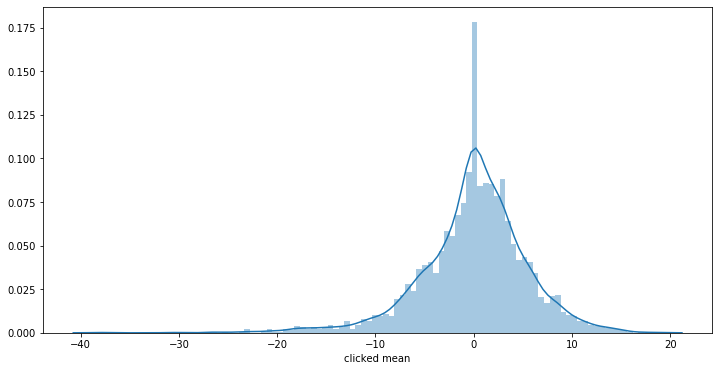

In [0]:
# no 512
plt.figure(figsize = (12,6))
sns.distplot(100*(pr-y),bins = 100)

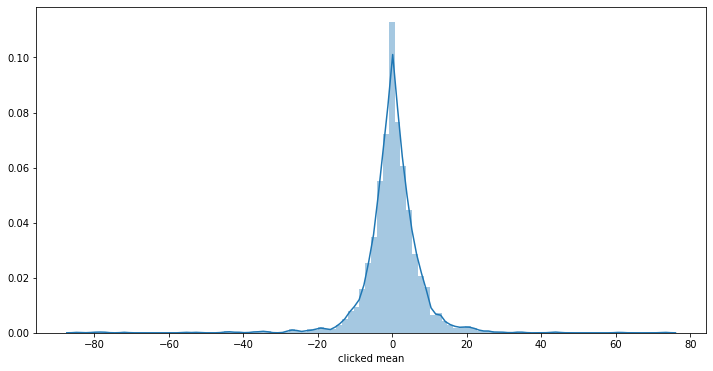

In [0]:
# with 512
plt.figure(figsize = (12,6))
sns.distplot(100*(pr-y),bins = 100)

In [0]:
new_train_df_ctr = pd.DataFrame(data = {'adId':X['adId'], 'clicked mean':pr})

In [0]:
new_train_df_ctr.describe()

,adId,clicked mean
count,2616.000000,2616.000000
mean,5167.836009,0.182120
std,1914.858044,0.062228
min,6.000000,0.063472
25%,4490.500000,0.134933
50%,5831.500000,0.171921
75%,6505.250000,0.218924
max,7182.000000,0.635584


In [0]:
del model

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
batch_size = len(X_train)

model = Sequential()


model.add(Dense(664))
model.add(Activation('relu'))
#model.add(Dropout(0.2))


model.add(Dense(300))
model.add(Activation('relu'))
#model.add(Dropout(0.5))

model.add(Dense(1))
#model.add(Activation('relu'))



model.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy'])

batch_size = 1998
model.fit(
    x = X.values,
    y = y.values,
    batch_size = batch_size,
    epochs = 2000,
    verbose = 0
)

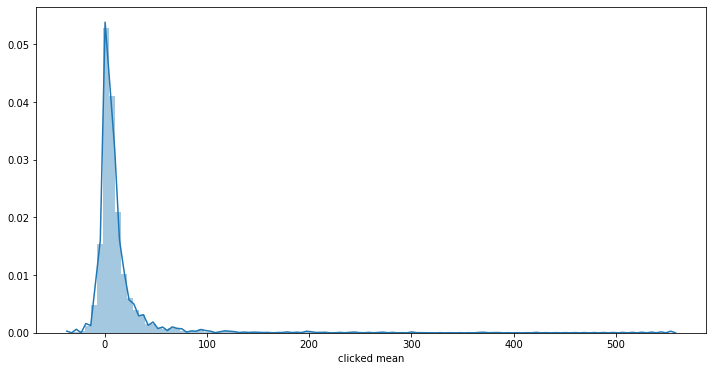

In [0]:
#model.predict(X_test)
plt.figure(figsize = (12,6))
sns.distplot(100*(np.squeeze(model.predict(X))-y),bins = 100)

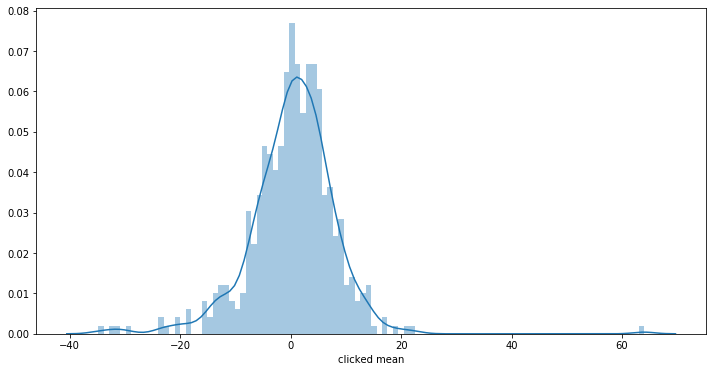

In [0]:
plt.figure(figsize = (12,6))
sns.distplot(100*(pr-y_test),bins = 100)

In [0]:
mse(np.squeeze(model.predict(X_test)),y_test)

0.11528348696667848

In [0]:
mae(np.squeeze(model.predict(X_test)),y_test)

0.14207499664999168

###lr output

In [0]:
pr[:5]

array([0.27491364, 0.27352322, 0.11763898, 0.21246459, 0.19497119])

In [0]:
click_test

In [0]:
new_test = ad_complete.merge(train_yes_data)

In [0]:
test_yes_data = click_test.groupby('adId').agg({'displayId':'count'}).rename(columns = {'displayId':'clicked count'})

In [0]:
new_test = dummy_ad_complete.merge(test_yes_data,on = 'adId').reset_index()

In [0]:
test_pr = lr.predict(new_test)

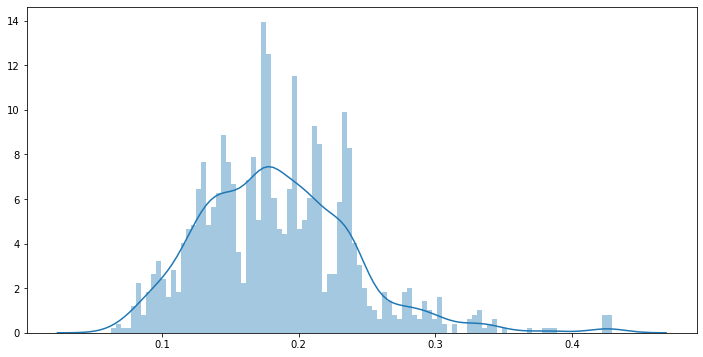

In [0]:
#Without 512
plt.figure(figsize = (12,6))
sns.distplot(test_pr,bins = 100)

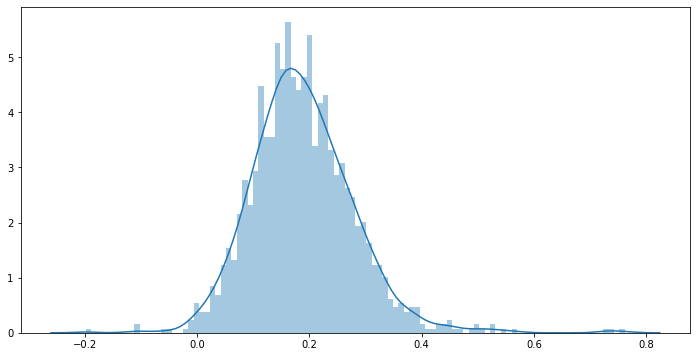

In [0]:
#With 512
plt.figure(figsize = (12,6))
sns.distplot(test_pr,bins = 100)

In [0]:
test_pr.mean()

0.18414785612034382

In [0]:
test_pr.max()

0.4295612538853162

In [0]:
test_pr.min()

0.06257595392591322

In [0]:
new_test_df_ctr = pd.DataFrame(data = {'adId':new_test['adId'], 'clicked mean':test_pr})

In [0]:
new_test_df_ctr

,adId,clicked mean
0,7867,0.230812
1,7866,0.230813
2,7865,0.230821
3,7863,0.208925
4,7862,0.213492
...,...,...
1345,19,0.259281
1346,17,0.379946
1347,14,0.295586
1348,11,0.093745


In [0]:
ad_ctr_complete = new_train_df_ctr.append(new_test_df_ctr).groupby('adId').first().reset_index()

In [0]:
ad_ctr_complete.describe()

,adId,clicked mean
count,3256.000000,3256.000000
mean,5624.645577,0.182763
std,1957.739025,0.059084
min,6.000000,0.063472
25%,5220.750000,0.139454
50%,6150.500000,0.175725
75%,6994.250000,0.217069
max,7867.000000,0.635584


In [0]:
if ad_ctr_complete['clicked mean'].min()<0:
  ad_ctr_complete['clicked mean'] = ad_ctr_complete['clicked mean'] + np.abs(ad_ctr_complete['clicked mean'].min())

In [0]:
ad_ctr_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3256 entries, 0 to 3255
Data columns (total 2 columns):
adId            3256 non-null int64
clicked mean    3256 non-null float64
dtypes: float64(1), int64(1)
memory usage: 51.0 KB


In [0]:
ad_ctr_complete.to_csv("LR_likelihood.csv")

In [0]:
ad_ctr_complete[ad_ctr_complete['adId']==6]

,adId,clicked mean
0,6,0.295861


## LR and NN using widgetId features

In [0]:
t4.groupby('widgetId')['clicked'].agg(['mean','count','sum'])

,mean,count,sum
widgetId,,,
9,0.368750,960,354
62,0.500000,6,3
101,0.194444,108,21
113,0.195093,856,167
115,0.227549,22716,5169
...,...,...,...
14344,0.373585,265,99
14355,0.357143,14,5
14364,0.200000,40,8


In [0]:
t4[t4['widgetId']==9]

,displayId,adId,clicked,pageId,widgetId,userId,device,OS,browser,website,publisher,campaignId,advertiserId,wordIdcount,Month,Day of the month,Day of the week,Hour
87252,3218079,1013,1,6512567,9,1906518,1,1,0,265,234,5103,8193,5,1,13,0,14
87920,3307662,1013,1,1743511,9,1956256,1,1,0,265,234,5103,8193,5,1,13,0,8
87921,3308017,1013,0,1741286,9,1956276,1,4,0,265,234,5103,8193,5,1,13,0,8
89744,3601593,1013,1,7227652,9,2113198,1,1,0,265,234,5103,8193,5,1,12,6,6
93745,4669394,1013,1,6262686,9,1346254,1,1,4,265,234,5103,8193,5,1,8,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3611528,4669394,2419,0,6262686,9,1346254,1,1,4,265,234,2118,7901,5,1,8,2,2
3611530,4660472,2419,1,6267010,9,1999677,1,1,0,265,234,2118,7901,5,1,8,2,2
3611531,4660731,2419,1,6267010,9,1999677,1,1,0,265,234,2118,7901,5,1,8,2,2
3612284,4638144,2416,0,975956,9,2653330,1,1,4,265,234,2118,7901,5,1,8,2,4


In [0]:
desdf(t4[t4['widgetId']==9])

The length of this df is 960
There are 354 unique values in displayId.
There are 120 unique values in adId.
There are 2 unique values in clicked.
There are 122 unique values in pageId.
There are 1 unique values in widgetId.
There are 332 unique values in userId.
There are 3 unique values in device.
There are 6 unique values in OS.
There are 7 unique values in browser.
There are 1 unique values in website.
There are 1 unique values in publisher.
There are 67 unique values in campaignId.
There are 47 unique values in advertiserId.
There are 9 unique values in wordIdcount.
There are 1 unique values in Month.
There are 15 unique values in Day of the month.
There are 7 unique values in Day of the week.
There are 24 unique values in Hour.


In [0]:
desdf(t4[t4['publisher']==234])

The length of this df is 4314
There are 1342 unique values in displayId.
There are 373 unique values in adId.
There are 2 unique values in clicked.
There are 229 unique values in pageId.
There are 5 unique values in widgetId.
There are 1148 unique values in userId.
There are 3 unique values in device.
There are 6 unique values in OS.
There are 12 unique values in browser.
There are 1 unique values in website.
There are 1 unique values in publisher.
There are 158 unique values in campaignId.
There are 94 unique values in advertiserId.
There are 10 unique values in wordIdcount.
There are 1 unique values in Month.
There are 15 unique values in Day of the month.
There are 7 unique values in Day of the week.
There are 24 unique values in Hour.


In [0]:
desdf(t4[t4['advertiserId']==8193])

The length of this df is 76949
There are 56538 unique values in displayId.
There are 19 unique values in adId.
There are 2 unique values in clicked.
There are 24894 unique values in pageId.
There are 670 unique values in widgetId.
There are 44900 unique values in userId.
There are 1 unique values in device.
There are 4 unique values in OS.
There are 27 unique values in browser.
There are 885 unique values in website.
There are 479 unique values in publisher.
There are 5 unique values in campaignId.
There are 1 unique values in advertiserId.
There are 5 unique values in wordIdcount.
There are 1 unique values in Month.
There are 15 unique values in Day of the month.
There are 7 unique values in Day of the week.
There are 24 unique values in Hour.


In [0]:
desdf(t4[t4['website']==265])

The length of this df is 4314
There are 1342 unique values in displayId.
There are 373 unique values in adId.
There are 2 unique values in clicked.
There are 229 unique values in pageId.
There are 5 unique values in widgetId.
There are 1148 unique values in userId.
There are 3 unique values in device.
There are 6 unique values in OS.
There are 12 unique values in browser.
There are 1 unique values in website.
There are 1 unique values in publisher.
There are 158 unique values in campaignId.
There are 94 unique values in advertiserId.
There are 10 unique values in wordIdcount.
There are 1 unique values in Month.
There are 15 unique values in Day of the month.
There are 7 unique values in Day of the week.
There are 24 unique values in Hour.


In [0]:
#ex = t4[t4['widgetId']==9].drop(['Month','Day of the month','Day of the week','Hour'],axis = 1)
ex = t4.drop(['Month','Day of the month','Day of the week','Hour'],axis = 1)

In [0]:
desdf(ex)

The length of this df is 3642244
There are 812303 unique values in displayId.
There are 2616 unique values in adId.
There are 2 unique values in clicked.
There are 151723 unique values in pageId.
There are 1159 unique values in widgetId.
There are 646440 unique values in userId.
There are 4 unique values in device.
There are 7 unique values in OS.
There are 75 unique values in browser.
There are 2858 unique values in website.
There are 757 unique values in publisher.
There are 463 unique values in campaignId.
There are 196 unique values in advertiserId.
There are 11 unique values in wordIdcount.


In [0]:
pd.get_dummies(ex.set_index('widgetId')['pageId'])

In [0]:
ex.set_index('widgetId')['OS']

widgetId
9    1
9    1
9    4
9    1
9    1
    ..
9    1
9    1
9    1
9    1
9    0
Name: OS, Length: 960, dtype: int64

## LR and NN

In [0]:
X[wordidunq]=X[wordidunq]/5.5

In [0]:
X.drop(['advertiserId','campaignId','adId'],inplace=True,axis = 1)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()

In [0]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
pr = lr.predict(X_test)

In [0]:
pr.mean()

-3.7483205314091754

In [0]:
pr.max()

584.9947681399011

In [0]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test,pr)*100)
print(metrics.mean_absolute_error(y_test,pr)*100)

2849524.989870901
10157.840766477015


In [0]:
(100*(pr-y_test)).min()

-943.9536989828902

In [0]:
pr.min()

-9.302754566016004

In [0]:
pr.max()

1.612898436107353

In [0]:
X_train = X_train.values
y_train = y_train.values

In [0]:
X_train

,clicked count,wordIdcount,24,25,26,27,28,29,30,31,32,33,34,35,8,36,37,38,39,40,50,51,52,53,54,55,56,61,62,63,64,65,66,67,68,69,70,9,11,12,...,img472,img473,img474,img475,img476,img477,img478,img479,img480,img481,img482,img483,img484,img485,img486,img487,img488,img489,img490,img491,img492,img493,img494,img495,img496,img497,img498,img499,img500,img501,img502,img503,img504,img505,img506,img507,img508,img509,img510,img511
350,607,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.482410,0.247781,0.393921,0.026086,0.053544,0.598650,0.000000,0.000000,0.099599,0.658603,0.322571,0.000000,0.036955,0.151231,0.056835,0.020681,0.112012,0.112197,0.380164,0.004618,0.513337,0.100947,0.018062,0.305143,0.062394,0.000000,0.000000,0.065280,0.173703,0.078607,0.224920,0.180896,0.065882,0.013281,0.000000,0.000000,0.102569,0.224415
2330,237,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.124179,0.000000,0.130455,0.016162,0.000000,0.413234,0.000000,0.043357,0.327464,0.072522,0.000000,0.730522,0.222300,3.326243,0.000000,0.054010,0.000000,0.000000,0.014469,0.000000,0.024694,0.000000,0.033063,1.968225,0.088370,0.000000,0.525390,0.012680,0.027915,0.276194,0.434837,0.000000,0.198911,1.885036,0.000000,0.116857,0.000000,0.079798,0.263807
2218,124,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.048777,0.414811,0.132744,0.167607,0.136395,1.861877,0.063152,0.000000,0.147265,0.640140,0.000000,0.123878,0.000000,0.000000,0.386748,0.291791,0.000000,1.150321,0.000000,1.586588,0.287429,0.254583,0.040065,0.244164,0.540266,0.012132,0.000000,0.493847,0.659159,0.384824,0.552940,0.041048,0.560265,0.000000,0.067675,2.591717,0.027882,0.218682,0.102271
1655,73,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.044184,0.110159,0.168908,0.041728,0.830724,0.000000,0.000000,0.702024,0.018725,0.000000,0.097101,0.306717,0.116477,0.000000,0.489190,0.000000,1.920540,0.000000,0.133236,0.000000,0.049378,0.000000,0.830579,0.000000,0.035800,0.003400,0.017270,0.009585,0.118479,0.655490,0.176052,1.648730,0.000000,0.000000,0.477421,0.000000,0.226206,0.035417
2453,195,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.240067,0.945987,0.189704,0.000000,0.276059,0.169638,0.017607,0.786247,0.044667,0.184642,0.818919,0.069883,0.234762,0.183300,0.105844,0.000000,0.196993,0.260729,0.827435,0.028282,0.128788,0.016687,1.094385,0.000000,0.408179,0.033766,0.000000,0.266893,0.017351,0.000747,2.279251,0.563230,0.000000,0.245262,0.067280,0.091128,0.298963,0.143484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,762,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.189147,0.633306,0.033048,0.256171,0.000000,0.296790,0.000000,0.265611,0.035127,0.138853,0.360254,0.307342,0.022050,0.000000,0.199252,0.031001,0.098233,0.006503,0.172989,0.004597,0.074119,0.000000,0.310270,0.005633,0.112091,0.000000,0.079092,0.212817,0.010893,0.126102,0.282469,0.042404,0.024818,0.653729,0.256479,0.000000,0.065753,0.000129
1095,786,7,0.0,0.0,0.0,0.0,0.

In [0]:
len(X_train.columns)

2622

In [0]:
X_train.values

array([[6.07000000e+02, 3.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.02569014e-01, 2.24414855e-01],
       [2.37000000e+02, 9.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.97975808e-02, 2.63807148e-01],
       [1.24000000e+02, 6.00000000e+00, 0.00000000e+00, ...,
        2.78823730e-02, 2.18682036e-01, 1.02270640e-01],
       ...,
       [1.06600000e+03, 6.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.03993034e-01, 2.12885011e-02],
       [6.85000000e+02, 5.00000000e+00, 0.00000000e+00, ...,
        1.77975073e-01, 1.05783069e+00, 1.20621845e-01],
       [3.13000000e+02, 6.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 6.23541372e-03]])

In [0]:
del model

In [0]:
from keras.optimizers import Adam

In [0]:
optimizer = Adam(lr = 0.01)

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
batch_size = len(X_train)

model = Sequential()


model.add(Dense(2622))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(250))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))



model.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy'])

batch_size = batch_size
model.fit(
    x = X_train.values,
    y = y_train.values,
    batch_size = batch_size,
    epochs = 200,
    verbose = 1
)

Epoch 1/200
2034/2034 [==============================] - 1s 577us/step - loss: 376.6604 - acc: 0.0128
Epoch 2/200
2034/2034 [==============================] - 0s 67us/step - loss: 360.0787 - acc: 9.8328e-04
Epoch 3/200
2034/2034 [==============================] - 0s 63us/step - loss: 359.0319 - acc: 9.8328e-04
Epoch 4/200
2034/2034 [==============================] - 0s 61us/step - loss: 358.7696 - acc: 9.8328e-04
Epoch 5/200
2034/2034 [==============================] - 0s 58us/step - loss: 358.8315 - acc: 0.0000e+00
Epoch 6/200
2034/2034 [==============================] - 0s 60us/step - loss: 358.5285 - acc: 0.0000e+00
Epoch 7/200
2034/2034 [==============================] - 0s 59us/step - loss: 358.3719 - acc: 0.0000e+00
Epoch 8/200
2034/2034 [==============================] - 0s 57us/step - loss: 358.3141 - acc: 0.0000e+00
Epoch 9/200
2034/2034 [==============================] - 0s 55us/step - loss: 358.2898 - acc: 4.9164e-04
Epoch 10/200
2034/2034 [==============================] - 

In [0]:
100 * y_train.mean()

17.327537640876766

In [0]:
model.predict(X_test)

array([[-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0.04486243],
       [-0

## Something Else

In [0]:
X

,clicked count,wordIdcount,24,25,26,27,28,29,30,31,32,33,34,35,8,36,37,38,39,40,50,51,52,53,54,55,56,61,62,63,64,65,66,67,68,69,70,9,11,12,...,img472,img473,img474,img475,img476,img477,img478,img479,img480,img481,img482,img483,img484,img485,img486,img487,img488,img489,img490,img491,img492,img493,img494,img495,img496,img497,img498,img499,img500,img501,img502,img503,img504,img505,img506,img507,img508,img509,img510,img511
0,22691,8,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.016292,0.000000,0.020982,0.041510,0.044696,0.085550,0.039705,0.000000,0.000000,0.000000,0.016882,0.027069,0.349134,0.045165,0.000000,0.000000,0.006559,0.000000,1.300841,0.000000,0.151996,0.048492,0.056961,0.095317,2.653909,0.025437,0.007199,0.354738,0.000581,0.104648,0.123998,0.454925,0.000000,0.010478,0.205283,0.000000,0.006869,0.366349,0.359391,0.000000
1,4783,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.181818,0.181818,0.181818,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000494,0.169470,1.051682,0.407506,0.748407,0.127219,0.000000,0.000000,0.017871,0.100287,0.000000,0.650972,0.015033,0.588106,0.004054,0.000000,0.064311,1.232864,0.186062,0.149345,0.017724,0.004070,0.001033,0.596153,0.098894,0.080005,0.000000,0.000000,0.162687,0.938022,0.733772,0.000000,1.211627,0.486232,0.000000,0.118570,0.079808,0.159126,0.012901
2,10403,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.605146,0.071625,0.000000,0.000000,0.000000,0.367561,0.339801,0.004528,0.048181,0.842834,0.205092,0.000000,0.000000,0.449464,0.000000,0.007959,0.017569,0.013005,0.026099,0.000000,0.000000,0.000000,0.000501,0.003038,0.009856,0.001496,0.000000,0.000000,0.000000,0.000000,0.441291,0.193914,0.639011,0.046036,0.000000,0.061070,0.125147
3,3501,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.009038,0.072611,0.091483,0.043591,0.169537,0.665791,0.092252,0.060648,1.101984,1.064896,0.299483,0.472148,0.000000,0.403660,0.263321,0.001056,0.000000,0.730052,0.099494,0.833018,0.430730,0.429682,0.100405,0.180663,0.180886,0.376067,0.374140,0.053708,0.009303,0.058076,0.099905,1.024207,0.749125,0.017977,1.022663,2.738049,0.022185,0.135937,0.710172
4,2442,10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.0,0.0,0.0,...,0.000000,0.012246,0.137665,0.552205,0.414636,0.684089,0.113494,0.014620,0.007070,0.023856,0.017365,0.079236,0.314901,0.000592,0.100848,0.012733,0.007565,0.329065,0.340670,0.082991,0.044411,0.053757,0.042601,0.008812,0.378528,0.003535,0.111215,0.042984,0.001457,0.118423,0.693747,0.011229,0.093873,0.353185,0.941742,0.000000,0.555764,0.223577,0.071369,0.018053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [0]:
from sklearn.cluster import KMeans as K

In [0]:
model = K(6)

In [0]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
y = model.predict(X)

In [0]:
import matplotlib.pyplot as plt

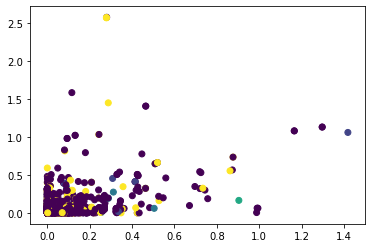

In [0]:
plt.scatter(X['img472'],X['img473'],c = y)

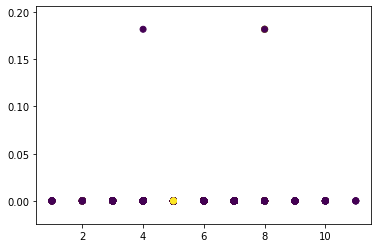

In [0]:
plt.scatter(X['wordIdcount'],X[25],c = y)

# Images

In [0]:
csvs

['ad_title.csv',
 'ad.csv',
 'event.csv',
 'click_test.csv',
 'page_topic.csv',
 'click_train.csv',
 'ad_image.csv',
 'page.csv',
 'user_page_view.csv']

In [0]:
ad_image.iloc[0][1]

'[0.0524589940905571, 0.0, 0.04262353479862213, 0.3335827887058258, 0.38356322050094604, 0.0016337124397978187, 0.34486910700798035, 0.5254691243171692, 0.05376036837697029, 0.0790339931845665, 0.5009145736694336, 0.6770318150520325, 0.0, 0.04745246469974518, 0.11314650624990463, 0.00764562888070941, 0.0, 0.1501387357711792, 0.03241937980055809, 0.004932682495564222, 0.0, 0.0, 0.5730596780776978, 0.019595881924033165, 0.0, 0.09223274141550064, 0.02514776773750782, 0.07260636240243912, 0.0, 0.5376994609832764, 0.0, 0.1540597379207611, 0.9559652805328369, 0.10546236485242844, 0.003840308403596282, 0.0, 0.09895025938749313, 0.0, 0.17928677797317505, 0.0, 0.5366105437278748, 0.2375306487083435, 0.04689086228609085, 0.8058763742446899, 0.0, 0.0, 0.01303254533559084, 1.113734483718872, 0.44265198707580566, 0.09719770401716232, 0.6938168406486511, 0.28377801179885864, 0.1759302318096161, 0.0, 0.012601906433701515, 0.3471967279911041, 0.0, 0.0766461044549942, 0.0, 0.00262973690405488, 0.006320

In [0]:
img_feature = ad_image['imageFeatures'].apply(lambda x : list(map(float,x[1:-1].replace(' ','').split(','))))

In [0]:
len(img_feature[0])

512

In [0]:
img_feat_df = pd.DataFrame(data = img_feature.values)

In [0]:
img_feat_df.iloc[0]

0    [0.0524589940905571, 0.0, 0.04262353479862213,...
Name: 0, dtype: object

In [0]:
np.array_str()

In [0]:
np.fromstring(ad_image.iloc[0][1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """Entry point for launching an IPython kernel.


ValueError: ignored

In [0]:
img_feature.values

array([list([0.0524589940905571, 0.0, 0.04262353479862213, 0.3335827887058258, 0.38356322050094604, 0.0016337124397978187, 0.34486910700798035, 0.5254691243171692, 0.05376036837697029, 0.0790339931845665, 0.5009145736694336, 0.6770318150520325, 0.0, 0.04745246469974518, 0.11314650624990463, 0.00764562888070941, 0.0, 0.1501387357711792, 0.03241937980055809, 0.004932682495564222, 0.0, 0.0, 0.5730596780776978, 0.019595881924033165, 0.0, 0.09223274141550064, 0.02514776773750782, 0.07260636240243912, 0.0, 0.5376994609832764, 0.0, 0.1540597379207611, 0.9559652805328369, 0.10546236485242844, 0.003840308403596282, 0.0, 0.09895025938749313, 0.0, 0.17928677797317505, 0.0, 0.5366105437278748, 0.2375306487083435, 0.04689086228609085, 0.8058763742446899, 0.0, 0.0, 0.01303254533559084, 1.113734483718872, 0.44265198707580566, 0.09719770401716232, 0.6938168406486511, 0.28377801179885864, 0.1759302318096161, 0.0, 0.012601906433701515, 0.3471967279911041, 0.0, 0.0766461044549942, 0.0, 0.0026297369040548

# Different Models

## استفاده از درصد تکرار درادآیدی

In [0]:
ads_clicked = click_train[click_train['clicked'] == 1]['adId'].value_counts()
ads_freq = click_train['adId'].value_counts()
ads_average = ads_clicked.values / ads_freq[ads_clicked.index]
constant = int(ads_freq.mean())
ads_adj_average = ads_clicked.values / ( ads_freq[ads_clicked.index] + constant )

avg_df = pd.DataFrame(data = {
    'adId' : ads_adj_average.index,
    'freq' : ads_adj_average.values
})

adId_zero_accurance = np.setdiff1d(click_train['adId'].unique(),avg_df['adId'].unique())
adId_zero_accurance = pd.DataFrame(data = {
    'adId':adId_zero_accurance,
    'freq' : 0
})

avg_df = pd.concat([avg_df,adId_zero_accurance])
t4_copy =  (t4.merge(avg_df,left_on='adId',right_on='adId')).copy()


In [0]:
t4_copy.head(3)

,displayId,adId,clicked,pageId,widgetId,userId,device,OS,browser,website,publisher,campaignId,advertiserId,wordId,Month,Day of the month,Day of the week,Hour,freq
0,1210227,535,0,420857,9519,782749,0,0,1,477,49,3186,1419,13,1,21,1,9,0.286344
1,1299669,535,1,8047191,6333,810968,2,2,2,12,11,3186,1419,13,1,21,1,6,0.286344
2,1311153,535,1,2285483,3148,815070,0,0,1,5,3,3186,1419,13,1,21,1,6,0.286344


In [0]:
missing_adId_test = pd.DataFrame(data = {
    'adId' : np.setdiff1d(click_test['adId'].unique(),avg_df['adId'].unique()),
    'freq' : np.abs(np.random.randn(640)+0.05325998938762409)*0.12
})
complete_adId_train_test = pd.concat([avg_df,missing_adId_test])

In [0]:
f4_copy = f4.merge(complete_adId_train_test).copy()

In [0]:
f4_copy.head(3)

,displayId,adId,pageId,widgetId,userId,device,OS,browser,website,publisher,campaignId,advertiserId,wordId,Month,Day of the month,Day of the week,Hour,freq
0,151650,6257,4095035,8107,10279,1,1,7,4600,1098,1083,4726,76,1,25,5,18,0.083333
1,244340,6257,4094409,13942,505,1,1,8,4600,1098,1083,4726,76,1,25,5,20,0.083333
2,244398,6257,399942,13942,385,1,1,0,4600,1098,1083,4726,76,1,25,5,20,0.083333


In [0]:
from sklearn.model_selection import train_test_split
X = t4_copy.drop(['clicked'],axis=1)
y = t4_copy['clicked']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
del X,y

## Logistic

In [0]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, y_train)
proba_lg = lg.predict_proba(X_test)
predict_lg = lg.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,predict_lg))
print(classification_report(y_test,predict_lg))
print(accuracy_score(y_test,predict_lg))

In [0]:
proba_lg_f4 = lg.predict_proba(f4)

In [0]:
f4_copy = f4.copy()

In [0]:
f4_copy['order'] = proba_lg_f4[:,1]

In [0]:
f4_copy=f4_copy.groupby(['displayId','adId']).first()['order'].reset_index()

In [0]:
f4_copy['rank']=f4_copy.groupby('displayId').rank(ascending = False)['order'].astype('uint8')

In [0]:
f4_copy.drop('order',axis = 1,inplace = True)

In [0]:
f4_copy.to_csv('Trial 11.csv',index = False,header=False)

## Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression
ling = LinearRegression()
ling.fit(X_train, y_train)
predict_ling = ling.predict(f4)
#from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#print(confusion_matrix(y_test,predict_lg))
#print(classification_report(y_test,predict_lg))
#print(accuracy_score(y_test,predict_lg))

In [0]:
f4_copy = f4.copy()
f4_copy['order'] = predict_ling
f4_copy=f4_copy.groupby(['displayId','adId']).first()['order'].reset_index()
f4_copy['rank']=f4_copy.groupby('displayId').rank(ascending = False)['order'].astype('uint8')
f4_copy.drop('order',axis = 1,inplace = True)
f4_copy.to_csv('Trial 12.csv',index = False,header=False)

In [0]:
!cp Trial_12.csv ../../gdrive/My\ Drive

## DTC

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
predic_dtc = dtc.predict(X_test)
print(confusion_matrix(y_test,predic_dtc))
print(classification_report(y_test,predic_dtc))
print(accuracy_score(y_test,predic_dtc))

## Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=400,max_depth=15)
rfc.fit(X_train,y_train)
pr = rfc.predict_proba(X_test)

In [0]:
pr = rfc.predict_proba(f4_copy)

In [0]:
f4_copy['order']=pr[:,1]
fg=f4_copy.groupby(['displayId','adId']).first()['order'].reset_index()
fg['rank']=fg.groupby(['displayId']).rank(ascending=False,method='first')['order'].astype('uint8')
fg.drop('order',axis=1,inplace=True)
fg.to_csv('trial25.csv',header=False,index=False)

In [0]:
fg

,displayId,adId,rank
0,151650,6257,1
1,151650,6690,2
2,151650,7585,3
3,151938,123,6
4,151938,6690,1
...,...,...,...
1199043,1328957,7039,1
1199044,1328976,535,1
1199045,1328976,7167,3
1199046,1328976,7174,4


# Ad Image (512 Columns) Failed Horribly

In [0]:
ad_image_copy = ad_image.copy()
n = 512
ad_image_copy['imageFeatures']=ad_image_copy['imageFeatures'].apply(lambda x:x[1:-1])
ad_image_copy['imageFeatures']=ad_image_copy['imageFeatures'].apply(lambda x:x.split(','))
ad_image_copy['imageFeatures']=ad_image_copy['imageFeatures'].apply(lambda x:x[0:n])

In [0]:
df=pd.DataFrame(index=range(0,3256))
for i in range(0,n):
  df[i]=ad_image_copy['imageFeatures'].apply(lambda x:float(x[i]))

In [0]:
df = df.astype('float16')

In [0]:
click_train['adId'].nunique()

2616

In [0]:
#df = df.merge(click_train.groupby('adId').agg({'clicked':'mean'}).reset_index(),how = 'inner')

In [0]:
df['adId'] =ad_image_copy['adId']

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3256 entries, 0 to 3255
Columns: 513 entries, 0 to adId
dtypes: float16(512), int64(1)
memory usage: 3.2 MB


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3256 entries, 0 to 3255
Columns: 513 entries, 0 to adId
dtypes: float16(512), int64(1)
memory usage: 3.2 MB


In [0]:
del t3, event,ad,ad_image,ad_title,click_test,click_train,page,page_topic,user_page_view

In [0]:
t4 = t4.astype('int32')

In [0]:
t4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642244 entries, 0 to 3642243
Data columns (total 18 columns):
displayId           int32
adId                int32
clicked             int32
pageId              int32
widgetId            int32
userId              int32
device              int32
OS                  int32
browser             int32
website             int32
publisher           int32
campaignId          int32
advertiserId        int32
wordId              int32
Month               int32
Day of the month    int32
Day of the week     int32
Hour                int32
dtypes: int32(18)
memory usage: 250.1 MB


In [0]:
t4 = t4.merge(df,left_on = 'adId',right_on = 'adId')

In [0]:
t4.info()

In [0]:
try :
  del ZipFile
except:
  pass

In [0]:
del ad_image_copy,ad_title_copy_train,data_cleaning_ad_title,final_adId_train,rand_word_id,rand_word_id_adId

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(t4.drop(['clicked'],axis=1), t4['clicked'], test_size=0.33)

In [0]:
X_train, y_train = t4.drop(['clicked'],axis=1), t4['clicked']

In [0]:
del t4

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=400,max_depth=15,verbose = 2,n_jobs = -1)

In [0]:
rfc.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400building tree 2 of 400building tree 3 of 400building tree 4 of 400



building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 14.5min


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 40.6min


building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 82.1min


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 90.7min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=2,
                       warm_start=False)

In [0]:
# Save to file in the current working directory
import pickle
pkl_filename = "../../gdrive/My Drive/pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rfc, file)

In [0]:
del X_train,y_train,X_test,y_test

In [0]:
# Save to file in the current working directory
import pickle
pkl_filename = "../../gdrive/My Drive/pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rfc, file)

In [0]:
# Load from file
import pickle
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

In [0]:
f4 = f4.merge(df,left_on = 'adId',right_on = 'adId')

In [0]:
f4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199048 entries, 0 to 1199047
Columns: 529 entries, displayId to 511
dtypes: float16(512), int64(17)
memory usage: 1.3 GB


In [0]:
rfc_proba = rfc.predict_proba(f4)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    7.5s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   17.2s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:   19.2s finished


In [0]:
len(rfc_proba)

1199048

In [0]:
len(click_test)

1199048

In [0]:
f4['order']=rfc_proba[:,1]
fg=f4.groupby(['displayId','adId']).first()['order'].reset_index()
fg['rank']=fg.groupby(['displayId']).rank(ascending=False,method='first')['order'].astype('uint8')
fg.drop('order',axis=1,inplace=True)
fg.to_csv('trial28.csv',header=False,index=False)

In [0]:
f4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199048 entries, 0 to 1199047
Columns: 529 entries, displayId to 511
dtypes: float16(512), int64(17)
memory usage: 1.3 GB


In [0]:
click_test['order'] = rfc_proba[:,1]
fg = click_test.groupby(['displayId','adId']).first()['order'].reset_index()
fg['rank']=fg.groupby(['displayId']).rank(ascending=False,method='first')['order'].astype('uint8')
fg.drop('order',axis=1,inplace=True)
fg.to_csv('trial28.csv',header=False,index=False)

# Using NN

In [0]:
ad_image_copy = ad_image.copy()
n = 512
ad_image_copy['imageFeatures']=ad_image_copy['imageFeatures'].apply(lambda x:x[1:-1])
ad_image_copy['imageFeatures']=ad_image_copy['imageFeatures'].apply(lambda x:x.split(','))
ad_image_copy['imageFeatures']=ad_image_copy['imageFeatures'].apply(lambda x:x[0:n])

In [0]:
df=pd.DataFrame(index=range(0,3256))
for i in range(0,512):
  df[i]=ad_image_copy['imageFeatures'].apply(lambda x:float(x[i]))
df['adId'] = ad_image['adId']

In [0]:
click_train_gp = click_train.groupby('adId').agg({'clicked':'mean'}).reset_index()
click_test_gp = click_test.groupby('adId').agg({'displayId':'min'}).reset_index().drop('displayId',axis = 1)

In [0]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,adId
0,0.052459,0.000000,0.042624,0.333583,0.383563,0.001634,0.344869,0.525469,0.05376,0.079034,0.500915,0.677032,0.000000,0.047452,0.113147,0.007646,0.000000,0.150139,0.032419,0.004933,0.0,0.000000,0.573060,0.019596,0.0,0.092233,0.025148,0.072606,0.000000,0.537699,0.0,0.154060,0.955965,0.105462,0.00384,0.000000,0.098950,0.0,0.179287,0.0000,...,0.0,1.014188,0.149694,0.106801,0.168865,0.019656,0.081902,0.339181,0.134276,0.016473,0.193523,0.409411,0.127201,0.406103,0.0,0.0,0.007431,0.295453,0.348585,0.11280,0.000000,0.281564,0.044966,0.145961,0.000000,0.144654,0.090878,0.076503,0.223643,0.233728,0.539480,0.152508,0.344518,0.778731,0.078295,0.160162,0.0,0.305145,0.018119,7867
1,0.003216,0.144424,0.000149,0.246036,0.133644,0.000000,0.915359,0.494597,0.00000,0.244905,0.000000,0.285869,0.010935,0.193851,0.123908,0.000000,0.001576,0.479430,0.099850,0.397035,0.0,0.083739,0.365803,0.000000,0.0,0.368738,0.038240,0.530159,0.035848,0.759484,0.0,0.387569,0.231120,0.000000,0.00000,0.048897,0.073044,0.0,0.003703,0.0067,...,0.0,1.067591,0.321311,0.061691,0.549251,0.720629,0.396768,0.056078,0.066055,0.000000,0.090988,0.282183,0.111141,1.165328,0.0,0.0,0.017706,0.000000,0.170955,0.64939,0.097097,0.025450,0.087521,0.186865,0.039025,0.185869,0.285500,0.218107,0.274950,0.024028,0.429552,0.124412,0.884689,0.471237,0.018215,0.321597,0.0,0.471502,0.000000,7866


In [0]:
click_train_gp = click_train_gp.merge(df,left_on = 'adId',right_on = 'adId')
click_test_gp = click_test_gp.merge(df,left_on = 'adId',right_on = 'adId')

In [0]:
click_test_gp.head(2)

,adId,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511
0,8,0.156233,0.000987,0.014774,0.207742,0.038036,0.011584,0.449074,0.066243,0.148653,0.325433,0.000000,0.000000,0.0,0.163769,0.017196,0.00000,0.000000,0.130880,0.011060,0.000000,0.000000,0.000000,0.168378,0.141639,0.000000,0.059899,0.000000,0.000000,0.000000,0.021272,0.0,0.000000,0.05582,0.000000,0.000000,0.0,0.000000,0.001735,0.000000,...,0.0,0.000000,0.000000,0.605146,0.071625,0.000000,0.000000,0.000000,0.367561,0.339801,0.004528,0.048181,0.842834,0.205092,0.00000,0.000000,0.449464,0.0,0.007959,0.017569,0.013005,0.026099,0.000000,0.000000,0.000000,0.000501,0.003038,0.009856,0.001496,0.000000,0.000000,0.000000,0.000000,0.441291,0.193914,0.639011,0.046036,0.000000,0.061070,0.125147
1,11,0.042971,0.016430,0.070029,0.000000,0.562984,0.223415,1.144221,0.630494,0.123705,0.154114,0.044677,0.347261,0.0,0.047664,0.040447,0.21691,0.026641,0.019433,0.008268,0.599473,0.283056,0.139049,0.000000,0.530017,0.017193,0.020518,0.705169,0.921087,0.263809,0.777408,0.0,0.647083,0.00000,0.116909,0.062752,0.0,0.104646,0.000000,0.068226,...,0.0,0.009038,0.072611,0.091483,0.043591,0.169537,0.665791,0.092252,0.060648,1.101984,1.064896,0.299483,0.472148,0.000000,0.40366,0.263321,0.001056,0.0,0.730052,0.099494,0.833018,0.430730,0.429682,0.100405,0.180663,0.180886,0.376067,0.374140,0.053708,0.009303,0.058076,0.099905,1.024207,0.749125,0.017977,1.022663,2.738049,0.022185,0.135937,0.710172


In [0]:
y_train = click_train_gp['clicked'].values
x_train = click_train_gp.drop(['adId','clicked'],axis = 1).values

x_test = click_test_gp.drop(['adId'],axis = 1).values

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
batch_size = len(x_train)
model = Sequential()


model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Dense(8))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))



model.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy'])

batch_size = batch_size
model.fit(
    x = x_train,
    y = y_train,
    batch_size = batch_size,
    epochs = 300,
    verbose = 3
)

In [0]:
df.drop('adId',axis = 1).mean(axis = 0).sort_values(ascending = False).index[:]

Index([ 78,  38, 384, 128, 415, 455, 262, 148, 109, 184,
       ...
       346, 268, 352, 489, 377, 113, 187, 261, 367, 351],
      dtype='object', length=200)

In [0]:
df.drop('adId',axis = 1).mean(axis = 0).sort_values(ascending = False).values

array([1.30851631, 1.12225251, 0.82691137, 0.80405433, 0.78218065,
       0.73634242, 0.70965369, 0.69274853, 0.69146875, 0.6889403 ,
       0.6229907 , 0.61880319, 0.61482171, 0.5954731 , 0.59047453,
       0.58768538, 0.57954758, 0.57471384, 0.56768651, 0.55765792,
       0.55732807, 0.54323306, 0.52532871, 0.52015964, 0.51217563,
       0.50409312, 0.50289964, 0.50276503, 0.50214826, 0.4987191 ,
       0.49808107, 0.48981554, 0.4785765 , 0.46874272, 0.46725702,
       0.46631451, 0.46196794, 0.45987828, 0.44776201, 0.439331  ,
       0.43899722, 0.43637369, 0.43600117, 0.43215414, 0.43134944,
       0.42925015, 0.42779073, 0.42778437, 0.426815  , 0.42640153,
       0.42631368, 0.42236213, 0.41967716, 0.41796013, 0.41300412,
       0.41019217, 0.41005695, 0.40932392, 0.40779476, 0.40531596,
       0.40419941, 0.40312088, 0.39968317, 0.39958117, 0.39638117,
       0.39590572, 0.3955893 , 0.39460731, 0.39458014, 0.39446978,
       0.39352186, 0.39262571, 0.39124444, 0.38888273, 0.38865

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)              

In [0]:
from keras.models import Model



layer_name = 'dense_7'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
x_test_output = pd.DataFrame(intermediate_layer_model.predict(x_test))
x_test_output['adId'] = click_test['adId'].unique()

x_train_output = pd.DataFrame(intermediate_layer_model.predict(x_train))
x_train_output['adId'] = click_train['adId'].unique()

In [0]:
x_train_output.head(2)

,0,1,2,3,4,5,6,7,adId
0,0.548034,-0.474076,-0.39651,0.216865,0.824764,-0.345927,-0.429542,-0.354559,7182
1,3.234056,-3.025332,-2.38714,1.279561,5.103860,-2.089332,-2.779171,-2.303998,7125


In [0]:
x_test_output.head(2)

,0,1,2,3,4,5,6,7,adId
0,2.612539,-2.431822,-1.941901,1.022665,4.111767,-1.658245,-2.219613,-1.853026,7585
1,3.845421,-3.616402,-2.845559,1.510816,6.080729,-2.507269,-3.333700,-2.736853,6257


In [0]:
x_test_output['adId'].unique()
f4['adId'].nunique()

1350

In [0]:
y_train = t4['clicked']
X_train = (t4.merge(x_train_output)).drop('clicked',axis = 1)
X_test  = (f4.merge(x_test_output,left_on = 'adId',right_on= 'adId'))
#del t4,f4,x_train_output,x_test_output,ad_image,click_train

In [0]:
t3.head()

,displayId,adId,clicked,timestamp,pageId,widgetId,userId,device,OS,browser,website,publisher,campaignId,advertiserId
0,1210227,7182,0,1579598863403,420857,9519,782749,0,0,1,477,49,3402,7579
1,1248098,7182,0,1579595840497,619,6167,791563,0,2,2,18,17,3402,7579
2,1271266,7182,1,1579595490529,11611,12678,792543,0,0,1,69,66,3402,7579
3,1285917,7182,1,1579596863199,163,10142,788614,0,0,0,13,12,3402,7579
4,1336598,7182,1,1579597467698,163,10142,786811,0,0,1,13,12,3402,7579


In [0]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3642244 entries, 0 to 3642243
Data columns (total 25 columns):
displayId           int64
adId                int64
pageId              int64
widgetId            int64
userId              int64
device              int64
OS                  int64
browser             int64
website             int64
publisher           int64
campaignId          int64
advertiserId        int64
wordId              int64
Month               int64
Day of the month    int64
Day of the week     int64
Hour                int64
0                   float32
1                   float32
2                   float32
3                   float32
4                   float32
5                   float32
6                   float32
7                   float32
dtypes: float32(8), int64(17)
memory usage: 611.3 MB


In [0]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199048 entries, 0 to 1199047
Data columns (total 25 columns):
displayId           1199048 non-null int64
adId                1199048 non-null int64
pageId              1199048 non-null int64
widgetId            1199048 non-null int64
userId              1199048 non-null int64
device              1199048 non-null int64
OS                  1199048 non-null int64
browser             1199048 non-null int64
website             1199048 non-null int64
publisher           1199048 non-null int64
campaignId          1199048 non-null int64
advertiserId        1199048 non-null int64
wordId              1199048 non-null int64
Month               1199048 non-null int64
Day of the month    1199048 non-null int64
Day of the week     1199048 non-null int64
Hour                1199048 non-null int64
0                   1199048 non-null float32
1                   1199048 non-null float32
2                   1199048 non-null float32
3                   1

In [0]:
del t4,f4

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=400,max_depth=15,verbose = 2)

In [0]:
rfc.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 400


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s remaining:    0.0s


building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed: 69.5min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=2, warm_start=False)

In [0]:
# Save to file in the current working directory
#Model_2 : 8 features with NN
import pickle
pkl_filename = "../../gdrive/My Drive/pickle_model_2.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rfc, file)

In [0]:
rfc_prediction = rfc.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   42.4s finished


In [0]:
rfc_proba = rfc.predict_proba(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   45.1s finished


In [0]:
rfc_prediction.mean()

0.0

In [0]:
rfc_prediction_train = rfc.predict_proba(X_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  2.2min finished


In [0]:
rfc_proba[:20,:]

array([[0.7435577 , 0.2564423 ],
       [0.71744391, 0.28255609],
       [0.72334571, 0.27665429],
       [0.73593678, 0.26406322],
       [0.73566979, 0.26433021],
       [0.73701097, 0.26298903],
       [0.74317555, 0.25682445],
       [0.7411178 , 0.2588822 ],
       [0.74100228, 0.25899772],
       [0.74166513, 0.25833487],
       [0.71007665, 0.28992335],
       [0.69702925, 0.30297075],
       [0.7273642 , 0.2726358 ],
       [0.70952646, 0.29047354],
       [0.70952646, 0.29047354],
       [0.7404458 , 0.2595542 ],
       [0.72995303, 0.27004697],
       [0.70610293, 0.29389707],
       [0.73287108, 0.26712892],
       [0.73391296, 0.26608704]])

In [0]:
rfc_prediction_train[:20,1]

array([0.23212658, 0.24252877, 0.27282065, 0.23833058, 0.22579467,
       0.22579467, 0.25673525, 0.22836828, 0.26690111, 0.22950094,
       0.23512123, 0.22954994, 0.2326437 , 0.23261538, 0.22471172,
       0.24576503, 0.22532919, 0.23454615, 0.23704571, 0.24837516])

In [0]:
y_train[:20]

0     0
1     0
2     1
3     0
4     0
5     0
6     1
7     0
8     1
9     0
10    0
11    0
12    0
13    0
14    0
15    1
16    0
17    0
18    0
19    1
Name: clicked, dtype: int64

In [0]:
f4['order']=rfc_proba[:,1]
fg=f4.groupby(['displayId','adId']).first()['order'].reset_index()
fg['rank']=fg.groupby(['displayId']).rank(ascending=False,method='first')['order'].astype('uint8')
fg.drop('order',axis=1,inplace=True)
fg.to_csv('trial30.csv',header=False,index=False)

In [0]:
ax = ()

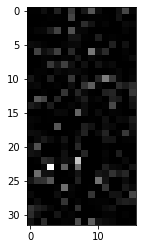

In [0]:
i = 4
plt.imshow(df.iloc[i].values[:-1].reshape((32,-1)),cmap = 'gray')

In [0]:
from scipy import signal

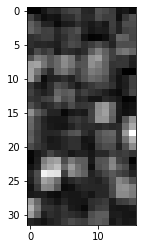

In [0]:
i = 5
scharr = np.array([[ 1,1,1],[1,1,1],[1,1,1]])

grad = signal.convolve2d(df.iloc[i].values[:-1].reshape((32,-1)), scharr, boundary='symm', mode='same')
plt.imshow(grad,cmap = 'gray')

In [0]:
grad.shape

(32, 16)

TypeError: ignored

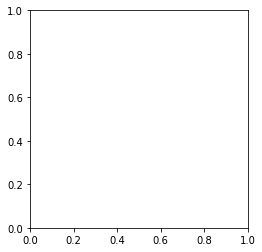

In [0]:
plt.imshow(grad,cmap = 'gray')

In [0]:
l = [375, 371, 403, 462, 396, 471, 197, 379, 355, 105]

In [0]:
ad_image['imageFeatures'].apply(lambda x:x[l])

In [0]:
ad_image

,adId,imageFeatures
0,7867,"[0.0524589940905571, 0.0, 0.04262353479862213,..."
1,7866,"[0.0032160670962184668, 0.1444239318370819, 0...."
2,7865,"[0.027210379019379616, 0.0, 0.5133526921272278..."
3,7863,"[0.0013980235671624541, 0.0, 0.0, 0.0455568209..."
4,7862,"[0.02426762878894806, 0.026081759482622147, 0...."
...,...,...
3251,13,"[0.14816689491271973, 0.04346756637096405, 1.3..."
3252,11,"[0.04297146946191788, 0.01642996445298195, 0.0..."
3253,8,"[0.15623298287391663, 0.00098716514185071, 0.0..."
3254,7,"[0.10627733916044235, 0.08754178136587143, 3.3..."


In [0]:
ad_image['imageFeatures']=ad_image['imageFeatures'].apply(lambda x:x[1:-1])
ad_image['imageFeatures']=ad_image['imageFeatures'].apply(lambda x:x.split(','))
ad_image['imageFeatures']=ad_image['imageFeatures'].apply(lambda x:x[0:80])
df=pd.DataFrame(columns=range(0,70),index=range(0,3256))
for i in range(0,70):
  df[i]=ad_image['imageFeatures'].apply(lambda x:float(x[i]))

In [0]:
df.drop('adId',axis = 1).mean(axis = 0)

0      0.299371
1      0.145720
2      0.422362
3      0.194339
4      0.410057
         ...   
507    0.381558
508    0.352487
509    0.127104
510    0.292198
511    0.333099
Length: 512, dtype: float64

In [0]:
df.drop('adId',axis = 1)/df.drop('adId',axis = 1).mean(axis = 0)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511
0,0.175230,0.000000,0.100917,1.716499,0.935390,0.010980,0.618424,1.974871,0.257534,0.307058,3.011711,2.333230,0.000000,0.438826,0.649108,0.073495,0.000000,0.437104,0.103729,0.016174,0.000000,0.000000,2.520372,0.116959,0.000000,0.665705,0.115479,0.294097,0.000000,1.743353,0.000000,0.622417,7.589479,0.547694,0.023913,0.000000,0.590970,0.000000,0.871031,0.000000,...,0.000000,0.000000,4.493951,0.394304,0.385881,0.664981,0.104344,0.638058,1.296232,0.365875,0.093719,1.863500,0.960351,0.942815,1.209994,0.000000,0.000000,0.308761,0.739219,1.617488,0.377046,0.000000,1.215555,0.351000,0.290316,0.000000,0.402200,0.798920,0.581859,1.582684,0.943965,1.767364,0.403235,0.560354,1.805337,0.205199,0.454377,0.000000,1.044311,0.054397
1,0.010743,0.991109,0.000352,1.266017,0.325915,0.000000,1.641434,1.858844,0.000000,0.951488,0.000000,0.985179,0.209858,1.792677,0.710846,0.000000,0.016376,1.395780,0.319481,1.301889,0.000000,0.713619,1.608836,0.000000,0.000000,2.661425,0.175601,2.147446,0.208320,2.462432,0.000000,1.565817,1.834882,0.000000,0.000000,0.626381,0.436246,0.000000,0.017991,0.029844,...,5.146992,0.000000,4.730587,0.846355,0.222894,2.162926,3.825380,3.091005,0.214311,0.179987,0.000000,0.876155,0.661914,0.823785,3.472119,0.000000,0.000000,0.735722,0.000000,0.793255,2.170654,0.647557,0.109870,0.683175,0.371674,0.259594,0.516796,2.509849,1.658854,1.945773,0.097043,1.407233,0.328950,1.438936,1.092472,0.047738,0.912366,0.000000,1.613641,0.000000
2,0.090892,0.000000,1.215433,1.521669,0.922293,0.000000,1.481556,0.000000,0.000000,1.857181,0.000000,0.682493,0.000000,0.449303,0.908137,0.000000,0.000000,0.031748,1.788284,0.000150,2.731706,0.033489,1.003492,0.000000,0.000000,0.049044,0.000000,0.104657,0.286992,0.017764,0.491329,0.141205,0.062154,0.000000,0.999255,4.183865,4.446803,0.000000,0.496536,0.060780,...,0.000000,1.604489,0.685616,0.384991,0.437483,1.528530,0.067665,0.251256,0.680905,0.037555,0.525029,0.000000,1.056681,0.000000,0.432076,0.185586,0.096304,3.225872,0.691180,0.000000,0.178673,0.605160,0.129548,0.986510,0.717781,0.000000,0.000000,0.000000,5.293802,0.000000,0.489586,0.249792,0.545023,2.220029,0.016597,0.058701,1.396456,0.083029,1.365108,0.895848
3,0.004670,0.000000,0.000000,0.234419,0.643907,0.191425,0.903958,0.000000,1.760292,1.011408,5.725249,0.034961,0.000000,0.170407,0.205596,0.742820,0.537581,0.000000,0.000000,0.075086,0.535401,0.000000,2.956909,1.479510,0.000000,1.538193,0.059074,0.447766,0.242834,0.053959,0.000000,0.000000,1.617711,0.000000,3.671631,0.088146,0.157904,1.671953,0.000000,0.000000,...,0.000000,0.000000,1.663002,1.645226,0.762134,0.000000,0.053413,4.760549,0.466351,0.004723,0.011972,5.700125,0.787653,0.288196,0.066486,0.000000,0.013020,0.000000,0.394472,0.000000,0.014857,0.044099,1.148578,3.907114,0.733625,0.000000,0.554136,0.000000,0.016677,3.733281,0.050845,1.912543,0.270856,1.778869,0.916438,0.774490,0.201009,1.646447,1.792724,0.000000
4,0.081062,0.178986,0.535126,0.118721,1.195154,0.028656,1.562704,0.011029,1.734102,5.122348,1.108553,0.000000,0.000000,2.329917,6.173156,0.961068,0.000000,0.000000,0.018871,0.140821,0.229277,0.031111,4.650890,0.000000,0.000000,0.220338,0.197348,0.099682,0.079659,0.981090,0.000000,0.000000,0.000000,0.000000,0.185512,0.000000,0.000000,0.000000,0.000000,0.258410,...,0.000000,0.000000,0.137274,0.456131,0.954331,0.000000,0.000000,0.000000,2.612178,0.612559,0.000000,0.090436,0.778518,0.166469,0.237781,0.000000,0.000000,0.000000,0.018215,0.338091,0.225418,0.000000,0.245880,0.000000,0.570702,0.100408,1.834504,0.000000,0.000000,0.508710,0.221990,3.767558,0.021747,2.312011,0.647570,0.417115,0.307767,0.000000,0.000000,0.048718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

# Omitting IDs


##Recreating The datasets

In [0]:
for col in f4.columns:
  print(f'{f4[col].nunique()} unique values in {col}.')

In [0]:
displayId = f4['displayId']

In [0]:
f4

In [0]:
#Finding Percentage for adId
#It had a lot of random values for click_test
adId_train = f4['adId']
ads_clicked = click_train[click_train['clicked'] == 1]['adId'].value_counts()
ads_freq = click_train['adId'].value_counts()
ads_average = ads_clicked.values / ads_freq[ads_clicked.index]
constant = int(ads_freq.mean())
ads_adj_average = ads_clicked.values / ( ads_freq[ads_clicked.index] + constant )

avg_df = pd.DataFrame(data = {
    'adId' : ads_adj_average.index,
    'freq' : ads_adj_average.values
})
adId_zero_accurance = np.setdiff1d(click_train['adId'].unique(),avg_df['adId'].unique())
adId_zero_accurance = pd.DataFrame(data = {
    'adId':adId_zero_accurance,
    'freq' : 0
})
avg_df = pd.concat([avg_df,adId_zero_accurance])
t4_copy =  (t4.merge(avg_df,left_on='adId',right_on='adId')).copy()
#t4_copy.drop('adId',axis = 1,inplace = True)
t4_copy.rename(columns={'freq':'adId_freq'},inplace = True)


missing_adId_test = pd.DataFrame(data = {
    'adId' : np.setdiff1d(click_test['adId'].unique(),avg_df['adId'].unique()),
    'freq' : np.abs(np.random.randn(640)+0.05325998938762409)*0.12
})
complete_adId_train_test = pd.concat([avg_df,missing_adId_test])
f4_copy = f4.merge(complete_adId_train_test).copy()
del ads_clicked,ads_freq,ads_average,constant,ads_adj_average,avg_df,adId_zero_accurance,missing_adId_test
adId_test = f4['adId']
# f4_copy.drop('adId',axis = 1,inplace = True)
f4_copy.rename(columns={'freq':'adId_freq'},inplace = True)

In [0]:
print(f4['Day of the month'].unique())
print(f4['Day of the week'].unique())
f4_copy.drop('Day of the month',axis=1,inplace=True)
t4_copy.drop('Day of the month',axis=1,inplace=True)

f4_copy.rename(columns = {'Day of the week':'Day'},inplace = True)
t4_copy.rename(columns = {'Day of the week':'Day'},inplace = True)

f4_copy.drop('Month',axis=1,inplace=True)
t4_copy.drop('Month',axis=1,inplace=True)

[25 24 23 22 21]
[5 4 3 2 1]


In [0]:
#Finding Percentage for displayId
diff = len(np.setdiff1d(click_test['displayId'],click_train['displayId']))
print('number of unique values for displayId in click_train : ',click_train['displayId'].nunique())
print('number of unique values for displayId in click_test : ',click_test['displayId'].nunique())
print('number of unique values for displayId in click_train that do not exist in click_test : ',diff)
del diff
print("It is logical to drop displayId while training")
# f4_copy.drop('displayId',axis = 1,inplace = True)
# t4_copy.drop('displayId',axis = 1,inplace = True)

displayId_train = click_train['displayId']
displayId_test  = click_test['displayId']

number of unique values for displayId in click_train :  812303
number of unique values for displayId in click_test :  270768
number of unique values for displayId in click_train that do not exist in click_test :  270768
It is logical to drop displayId while training


In [0]:
#Finding count for pageId
pageId_occur = pd.DataFrame(event.groupby(['pageId']).count().reset_index().set_index('pageId')['displayId']).rename(columns = {'displayId':'pageId_occurance'}).reset_index()
f4_copy = f4_copy.merge(pageId_occur.reset_index())
t4_copy = t4_copy.merge(pageId_occur.reset_index())

f4_copy.drop('pageId',axis = 1,inplace = True)
t4_copy.drop('pageId',axis = 1,inplace = True)
f4_copy.drop('index',axis = 1,inplace = True)
t4_copy.drop('index',axis = 1,inplace = True)

In [0]:
#Finding Percentage for widgetId
diff = len(np.setdiff1d(f4_copy['widgetId'],t4_copy['widgetId']))
print('number of unique values for widgetId in t4_copy : ',t4_copy['widgetId'].nunique())
print('number of unique values for widgetId in f4_copy : ',f4_copy['widgetId'].nunique())
print('number of unique values for widgetId in t4_copy that do not exist in f4_copy : ',diff)
del diff
widgetId_avg = t4_copy.groupby('widgetId').mean()['clicked']
widgetId_avg = pd.DataFrame(widgetId_avg).reset_index().rename({'clicked':'widgetId_avg'},axis = 1)
diff_widgetId = np.setdiff1d(f4_copy['widgetId'],t4_copy['widgetId'])
diff_widgetId = pd.DataFrame(data = {
    'widgetId' : diff_widgetId,
    'widgetId_avg' : widgetId_avg['widgetId_avg'].mean()
})
widgetId_avg=widgetId_avg.append(diff_widgetId).reset_index().drop('index',axis = 1)

f4_copy = f4_copy.merge(widgetId_avg)
t4_copy = t4_copy.merge(widgetId_avg)

f4_copy.drop('widgetId',axis = 1,inplace = True)
t4_copy.drop('widgetId',axis = 1,inplace = True)

del widgetId_avg,diff_widgetId

number of unique values for widgetId in t4_copy :  1159
number of unique values for widgetId in f4_copy :  955
number of unique values for widgetId in t4_copy that do not exist in f4_copy :  50


In [0]:
#Finding Percentage for userId
diff = len(np.setdiff1d(f4_copy['userId'],t4_copy['userId']))
print('number of unique values for userId in t4_copy : ',t4_copy['userId'].nunique())
print('number of unique values for userId in f4_copy : ',f4_copy['userId'].nunique())
print('number of unique values for userId in t4_copy that do not exist in f4_copy : ',diff)
del diff

print("It is logical to drop userId while training")
f4_copy.drop('userId',axis = 1,inplace = True)
t4_copy.drop('userId',axis = 1,inplace = True)

number of unique values for userId in t4_copy :  646440
number of unique values for userId in f4_copy :  227971
number of unique values for userId in t4_copy that do not exist in f4_copy :  197934
It is logical to drop userId while training


In [0]:
#Finding Percentage for website
diff = len(np.setdiff1d(f4_copy['website'],t4_copy['website']))
print('number of unique values for website in t4_copy : ',t4_copy['website'].nunique())
print('number of unique values for website in f4_copy : ',f4_copy['website'].nunique())
print('number of unique values for website in t4_copy that do not exist in f4_copy : ',diff)
del diff

website_avg = t4_copy.groupby('website').mean()['clicked']
website_avg = pd.DataFrame(website_avg).reset_index().rename({'clicked':'website_avg'},axis = 1)
diff_website = np.setdiff1d(f4_copy['website'],t4_copy['website'])
diff_website = pd.DataFrame(data = {
    'website' : diff_website,
    'website_avg' : website_avg['website_avg'].mean()
})
website_avg=website_avg.append(diff_website).reset_index().drop('index',axis = 1)

f4_copy = f4_copy.merge(website_avg)
t4_copy = t4_copy.merge(website_avg)

f4_copy.drop('website',axis = 1,inplace = True)
t4_copy.drop('website',axis = 1,inplace = True)

del website_avg,diff_website

number of unique values for website in t4_copy :  2858
number of unique values for website in f4_copy :  623
number of unique values for website in t4_copy that do not exist in f4_copy :  35


In [0]:
#Finding Percentage for publisher
diff = len(np.setdiff1d(f4_copy['publisher'],t4_copy['publisher']))
print('number of unique values for publisher in t4_copy : ',t4_copy['publisher'].nunique())
print('number of unique values for publisher in f4_copy : ',f4_copy['publisher'].nunique())
print('number of unique values for publisher in t4_copy that do not exist in f4_copy : ',diff)
del diff

publisher_avg = t4_copy.groupby('publisher').mean()['clicked']
publisher_avg = pd.DataFrame(publisher_avg).reset_index().rename({'clicked':'publisher_avg'},axis = 1)
diff_publisher = np.setdiff1d(f4_copy['publisher'],t4_copy['publisher'])
diff_publisher = pd.DataFrame(data = {
    'publisher' : diff_publisher,
    'publisher_avg' : publisher_avg['publisher_avg'].mean()
})
publisher_avg=publisher_avg.append(diff_publisher).reset_index().drop('index',axis = 1)

f4_copy = f4_copy.merge(publisher_avg)
t4_copy = t4_copy.merge(publisher_avg)

f4_copy.drop('publisher',axis = 1,inplace = True)
t4_copy.drop('publisher',axis = 1,inplace = True)

del publisher_avg,diff_publisher

number of unique values for publisher in t4_copy :  757
number of unique values for publisher in f4_copy :  574
number of unique values for publisher in t4_copy that do not exist in f4_copy :  25


In [0]:
#Finding Percentage for campaignId
diff = len(np.setdiff1d(f4_copy['campaignId'],t4_copy['campaignId']))
print('number of unique values for campaignId in t4_copy : ',t4_copy['campaignId'].nunique())
print('number of unique values for campaignId in f4_copy : ',f4_copy['campaignId'].nunique())
print('number of unique values for campaignId in t4_copy that do not exist in f4_copy : ',diff)
del diff

campaignId_avg = t4_copy.groupby('campaignId').mean()['clicked']
campaignId_avg = pd.DataFrame(campaignId_avg).reset_index().rename({'clicked':'campaignId_avg'},axis = 1)
diff_campaignId = np.setdiff1d(f4_copy['campaignId'],t4_copy['campaignId'])
diff_campaignId = pd.DataFrame(data = {
    'campaignId' : diff_campaignId,
    'campaignId_avg' : campaignId_avg['campaignId_avg'].mean()
})
campaignId_avg=campaignId_avg.append(diff_campaignId).reset_index().drop('index',axis = 1)

f4_copy = f4_copy.merge(campaignId_avg)
t4_copy = t4_copy.merge(campaignId_avg)

f4_copy.drop('campaignId',axis = 1,inplace = True)
t4_copy.drop('campaignId',axis = 1,inplace = True)

del campaignId_avg,diff_campaignId

number of unique values for campaignId in t4_copy :  463
number of unique values for campaignId in f4_copy :  290
number of unique values for campaignId in t4_copy that do not exist in f4_copy :  65


In [0]:
#Finding Percentage for advertiserId
diff = len(np.setdiff1d(f4_copy['advertiserId'],t4_copy['advertiserId']))
print('number of unique values for advertiserId in t4_copy : ',t4_copy['advertiserId'].nunique())
print('number of unique values for advertiserId in f4_copy : ',f4_copy['advertiserId'].nunique())
print('number of unique values for advertiserId in t4_copy that do not exist in f4_copy : ',diff)
del diff

advertiserId_avg = t4_copy.groupby('advertiserId').mean()['clicked']
advertiserId_avg = pd.DataFrame(advertiserId_avg).reset_index().rename({'clicked':'advertiserId_avg'},axis = 1)
diff_advertiserId	 = np.setdiff1d(f4_copy['advertiserId'],t4_copy['advertiserId'])
diff_advertiserId	 = pd.DataFrame(data = {
    'advertiserId' : diff_advertiserId,
    'advertiserId_avg' : advertiserId_avg['advertiserId_avg'].mean()
})
advertiserId_avg=advertiserId_avg.append(diff_advertiserId).reset_index().drop('index',axis = 1)

f4_copy = f4_copy.merge(advertiserId_avg)
t4_copy = t4_copy.merge(advertiserId_avg)

f4_copy.drop('advertiserId',axis = 1,inplace = True)
t4_copy.drop('advertiserId',axis = 1,inplace = True)

del advertiserId_avg,diff_advertiserId	

number of unique values for advertiserId in t4_copy :  196
number of unique values for advertiserId in f4_copy :  129
number of unique values for advertiserId in t4_copy that do not exist in f4_copy :  17


In [0]:
# #Finding Percentage for wordId
# diff = len(np.setdiff1d(f4_copy['wordId'],t4_copy['wordId']))
# print('number of unique values for wordId in t4_copy : ',t4_copy['wordId'].nunique())
# print('number of unique values for wordId in f4_copy : ',f4_copy['wordId'].nunique())
# print('number of unique values for wordId in t4_copy that do not exist in f4_copy : ',diff)
# del diff

# wordId_avg = t4_copy.groupby('wordId').mean()['clicked']
# wordId_avg = pd.DataFrame(wordId_avg).reset_index().rename({'clicked':'wordId_avg'},axis = 1)
# diff_wordId	 = np.setdiff1d(f4_copy['wordId'],t4_copy['wordId'])
# diff_wordId	 = pd.DataFrame(data = {
#     'wordId' : diff_wordId,
#     'wordId_avg' : wordId_avg['wordId_avg'].mean()
# })
# wordId_avg=wordId_avg.append(diff_wordId).reset_index().drop('index',axis = 1)

# f4_copy = f4_copy.merge(wordId_avg)
# t4_copy = t4_copy.merge(wordId_avg)

# f4_copy.drop('wordId',axis = 1,inplace = True)
# t4_copy.drop('wordId',axis = 1,inplace = True)

# del wordId_avg,diff_wordId	

In [0]:
for col in f4_copy.columns:
  print(f'{f4_copy[col].nunique()} unique values in {col}.')

In [0]:
for col in t4_copy.columns:
  print(f'{t4_copy[col].nunique()} unique values in {col}.')

In [0]:
f4_copy = f4_copy.groupby(['displayId','adId']).quantile().reset_index()

In [0]:
t4_copy = t4_copy.groupby(['displayId','adId']).quantile().reset_index()

## LGC Without adImg then NN

In [0]:
t4_copy.columns[2:12]

Index(['clicked', 'Hour', 'adId_freq', 'pageId_occurance', 'widgetId_avg',
       'website_avg', 'publisher_avg', 'campaignId_avg', 'advertiserId_avg',
       'wordId_avg'],
      dtype='object')

In [0]:
f4_copy.columns[0:11]

Index(['displayId', 'adId', 'Hour', 'adId_freq', 'pageId_occurance',
       'widgetId_avg', 'website_avg', 'publisher_avg', 'campaignId_avg',
       'advertiserId_avg', 'wordId_avg'],
      dtype='object')

In [0]:
X = t4_copy
X_unknown = f4_copy

In [0]:
t4_copy

In [0]:
X = t4_copy.drop(['clicked','displayId','adId','Hour'],axis = 1)
y = t4_copy['clicked']

X_unknown = f4_copy.drop(['displayId','adId','Hour'],axis = 1)

In [0]:
X

In [0]:
device = pd.get_dummies(X['device'],prefix='DEV',drop_first=True)
OS = pd.get_dummies(X['OS'],prefix='OS',drop_first=True)
#browser = pd.get_dummies(X['browser'],prefix='BRW',drop_first=True)
Day = pd.get_dummies(X['Day'],prefix='Day',drop_first=True)
X.drop(['device','OS','browser','Day'],axis = 1,inplace = True)
X = pd.concat([X,device,OS,Day],axis = 1)
X_unknown[['device','OS','browser','Day','Hour']]=X_unknown[['device','OS','browser','Day','Hour']].astype('uint16')
device = pd.get_dummies(X_unknown['device'],prefix='DEV',drop_first=True)
OS = pd.get_dummies(X_unknown['OS'],prefix='OS',drop_first=True)
#browser = pd.get_dummies(X_unknown['browser'],prefix='BRW',drop_first=True)
Day = pd.get_dummies(X_unknown['Day'],prefix='Day',drop_first=True)
X_unknown.drop(['device','OS','browser','Day'],axis = 1,inplace = True)
X_unknown = pd.concat([X_unknown,device,OS,Day],axis = 1)

In [0]:
del lg

In [0]:
X = t4.drop('clicked',axis = 1)
y = t4['clicked']
X_unknown = f4

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, y_train)
proba_lg = lg.predict_proba(X_test)
predict_lg = lg.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,predict_lg))
print(classification_report(y_test,predict_lg))
print(accuracy_score(y_test,predict_lg))

[[282276    607]
 [ 81096    246]]
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.87    282883
         1.0       0.29      0.00      0.01     81342

    accuracy                           0.78    364225
   macro avg       0.53      0.50      0.44    364225
weighted avg       0.67      0.78      0.68    364225

0.7756798682133297


In [0]:
lg.predict_proba(X_unknown)[:20]

array([[0.86401196, 0.13598804],
       [0.86728436, 0.13271564],
       [0.86172095, 0.13827905],
       [0.86403816, 0.13596184],
       [0.8640434 , 0.1359566 ],
       [0.8640303 , 0.1359697 ],
       [0.86240041, 0.13759959],
       [0.86383369, 0.13616631],
       [0.8640434 , 0.1359566 ],
       [0.86402244, 0.13597756],
       [0.86960871, 0.13039129],
       [0.86404078, 0.13595922],
       [0.86172095, 0.13827905],
       [0.86402768, 0.13597232],
       [0.86402768, 0.13597232],
       [0.86391761, 0.13608239],
       [0.86172095, 0.13827905],
       [0.86403816, 0.13596184],
       [0.86577036, 0.13422964],
       [0.86172095, 0.13827905]])

In [0]:
pd.DataFrame(data = {
    'feature':X_train.columns,
    'Coef':np.squeeze(lg.coef_)
}).sort_values(by = 'Coef',ascending = False)

,feature,Coef
0,adId_freq,1.127181
5,campaignId_avg,0.714421
2,widgetId_avg,0.608145
17,9,0.545538
6,advertiserId_avg,0.415731
7,wordId_avg,0.257504
9,1,0.206807
16,8,0.134838
3,website_avg,0.089312
4,publisher_avg,0.083455


In [0]:
f4_copy2 = f4_copy.copy()
pr = lg.predict_proba(X_unknown)
f4_copy2['order']=pr[:,1]
fg=f4_copy2.groupby(['displayId','adId']).first()['order'].reset_index()
fg['rank']=fg.groupby(['displayId']).rank(ascending=False,method='first')['order'].astype('uint8')
fg.drop('order',axis=1,inplace=True)
fg.to_csv('trial48.csv',header=False,index=False)

In [0]:
X_train

,adId_freq,pageId_occurance,widgetId_avg,website_avg,publisher_avg,campaignId_avg,advertiserId_avg,wordId_avg,0,1,2,3,4,5,6,7,8,9
295111,0.326211,310.0,0.245609,0.303489,0.303489,0.321926,0.276733,0.320462,0.375390,0.000000,0.557036,0.780078,0.164107,0.022104,0.000000,0.000000,0.100719,0.000000
121980,0.363416,6.0,0.135603,0.174448,0.174448,0.388502,0.352454,0.352389,0.000000,0.036688,0.000000,0.008969,0.000000,0.016015,0.107154,0.082726,0.230364,0.538150
3088683,0.010396,47.0,0.168364,0.168366,0.168366,0.169396,0.163101,0.166752,0.203457,0.003200,0.428375,0.134114,0.149793,0.121237,0.193216,0.030561,0.000000,0.639378
3485277,0.101852,64.0,0.235921,0.235921,0.235921,0.181366,0.169163,0.196977,0.231768,0.558843,3.397935,0.096665,1.476000,0.248541,0.034057,0.022208,0.000000,0.075409
3107111,0.098492,2.0,0.178159,0.206467,0.206467,0.160568,0.169163,0.141523,0.731186,0.028671,0.000000,0.000000,0.051610,0.000000,0.796169,0.903055,0.062821,0.047072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3533119,0.166607,1.0,0.322581,0.248927,0.248927,0.201433,0.213137,0.182957,0.000000,0.000000,1.582978,0.120700,0.358592,0.007774,0.154852,0.007147,0.035475,0.000000
871231,0.317580,2.0,0.181264,0.194994,0.194994,0.383348,0.314061,0.272645,0.065625,0.121609,0.001946,0.003808,0.308723,0.039206,0.000000,0.007761,0.001801,0.285644
1537205,0.265194,2.0,0.154472,0.154472,0.148578,0.274751,0.352454,0.279526,0.002793,0.070148,0.061224,0.015855,0.000000,0.200207,0.023970,0.000000,0.170666,0.335879
2838173,0.069048,2.0,0.192403,0.192895,0.192895,0.103276,0.117679,0.125428,0.000000,0.000000,0.023097,0.412668,0.347811,0.282962,0.564354,0.062996,0.000000,0.022965


In [0]:
del model

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
batch_size = len(X_train)

model = Sequential()

model.add(Dense(len(X_train.columns)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(8))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy'])

batch_size = batch_size
model.fit(
    
    x = X_train.values,
    y = y_train.values,
    validation_split = 0.2,
    batch_size = batch_size,
    epochs = 20,
    verbose = 2
)

Train on 2622415 samples, validate on 655604 samples
Epoch 1/20
 - 8s - loss: 0.2777 - acc: 0.6645 - val_loss: 0.2130 - val_acc: 0.7769
Epoch 2/20
 - 6s - loss: 0.2640 - acc: 0.6870 - val_loss: 0.2124 - val_acc: 0.7769
Epoch 3/20
 - 6s - loss: 0.2517 - acc: 0.7070 - val_loss: 0.2119 - val_acc: 0.7769
Epoch 4/20
 - 6s - loss: 0.2413 - acc: 0.7240 - val_loss: 0.2117 - val_acc: 0.7769
Epoch 5/20
 - 6s - loss: 0.2333 - acc: 0.7380 - val_loss: 0.2116 - val_acc: 0.7769
Epoch 6/20
 - 6s - loss: 0.2270 - acc: 0.7490 - val_loss: 0.2114 - val_acc: 0.7769
Epoch 7/20
 - 6s - loss: 0.2228 - acc: 0.7568 - val_loss: 0.2111 - val_acc: 0.7769
Epoch 8/20
 - 6s - loss: 0.2197 - acc: 0.7626 - val_loss: 0.2108 - val_acc: 0.7769
Epoch 9/20
 - 6s - loss: 0.2180 - acc: 0.7662 - val_loss: 0.2106 - val_acc: 0.7769
Epoch 10/20
 - 6s - loss: 0.2169 - acc: 0.7688 - val_loss: 0.2104 - val_acc: 0.7769
Epoch 11/20
 - 6s - loss: 0.2158 - acc: 0.7708 - val_loss: 0.2101 - val_acc: 0.7769
Epoch 12/20
 - 6s - loss: 0.2153

In [0]:
y

0          0.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
3642239    0.0
3642240    0.0
3642241    1.0
3642242    1.0
3642243    1.0
Name: clicked, Length: 3642244, dtype: float64

## RFC Without Adimg #42

In [0]:
X_train = t4_copy.drop(['adId','displayId','clicked'],axis = 1)
y_train = t4_copy['clicked']

X_test = f4_copy.drop(['adId','displayId'],axis = 1)

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=400,max_depth=15,verbose=2)
rfc.fit(X_train,y_train)

In [0]:
# Save to file in the current working directory
import pickle
pkl_filename = "../../gdrive/My Drive/pickle_model3.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rfc, file)

In [0]:
pr = rfc.predict_proba(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.5min finished


In [0]:
f4_copy['order']=pr[:,1]
fg=f4_copy.groupby(['displayId','adId']).first()['order'].reset_index()
fg['rank']=fg.groupby(['displayId']).rank(ascending=False,method='first')['order'].astype('uint8')
fg.drop('order',axis=1,inplace=True)
fg.to_csv('trial42.csv',header=False,index=False)

In [0]:
fg.head(20)

In [0]:
pd.DataFrame({
    'feat' : X_train.columns,
    'value' : rfc.feature_importances_*100
}).sort_values('value',ascending = False)

,feat,value
7,widgetId_avg,22.328464
10,campaignId_avg,15.250215
5,adId_freq,14.932521
11,advertiserId_avg,7.806284
8,website_avg,7.408747
12,wordId_avg,6.679398
9,publisher_avg,6.676093
4,Hour,5.757755
6,pageId_occurance,5.481810
3,Day,2.934750


## RFC Without Adimg with Get_Dummies #43

In [0]:
print(len(f4_copy))
print(len(t4_copy))

1199048
3642244


In [0]:
for col in f4_copy.columns:
  print(f'{f4_copy[col].nunique()} unique values in {col}.')

for col in t4_copy.columns:
  print(f'{t4_copy[col].nunique()} unique values in {col}.')

In [0]:
t4_copy[['device','OS','browser','Day','Hour']]=t4_copy[['device','OS','browser','Day','Hour']].astype('uint16')

In [0]:
device = pd.get_dummies(t4_copy['device'],prefix='DEV',drop_first=True)
OS = pd.get_dummies(t4_copy['OS'],prefix='OS',drop_first=True)
#browser = pd.get_dummies(t4_copy['browser'],prefix='BRW',drop_first=True)
Day = pd.get_dummies(t4_copy['Day'],prefix='Day',drop_first=True)
t4_copy.drop(['device','OS','browser','Day'],axis = 1,inplace = True)
t4_copy = pd.concat([t4_copy,device,OS,Day],axis = 1)

In [0]:
f4_copy[['device','OS','browser','Day','Hour']]=f4_copy[['device','OS','browser','Day','Hour']].astype('uint16')
device = pd.get_dummies(f4_copy['device'],prefix='DEV',drop_first=True)
OS = pd.get_dummies(f4_copy['OS'],prefix='OS',drop_first=True)
#browser = pd.get_dummies(f4_copy['browser'],prefix='BRW',drop_first=True)
Day = pd.get_dummies(f4_copy['Day'],prefix='Day',drop_first=True)
f4_copy.drop(['device','OS','browser','Day'],axis = 1,inplace = True)
f4_copy = pd.concat([f4_copy,device,OS,Day],axis = 1)

In [0]:
f4_copy['Day_6'] = 0

In [0]:
X_train = t4_copy.drop(['adId','displayId','clicked'],axis = 1)
y_train = t4_copy['clicked']
X_test = f4_copy.drop(['adId','displayId'],axis = 1)

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc2 = RandomForestClassifier(n_estimators=400,max_depth=15,verbose=2)
rfc2.fit(X_train,y_train)

In [0]:
# Save to file in the current working directory
import pickle
pkl_filename = "../../gdrive/My Drive/pickle_model4.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rfc2, file)

In [0]:
# Load from file
import pickle
pkl_filename = "../../gdrive/My Drive/pickle_model4.pkl"
with open(pkl_filename, 'rb') as file:
    rfc2 = pickle.load(file)

In [0]:
pr = rfc2.predict_proba(X_test)
f4_copy['order']=pr[:,1]
fg=f4_copy.groupby(['displayId','adId']).first()['order'].reset_index()
fg['rank']=fg.groupby(['displayId']).rank(ascending=False,method='first')['order'].astype('uint8')
fg.drop('order',axis=1,inplace=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.5min finished


In [0]:
fg.head(25)

,displayId,adId,rank
0,151650,6257,2
1,151650,6690,1
2,151650,7585,3
3,151938,123,4
4,151938,6690,1
5,151938,7370,5
6,151938,7379,2
7,151938,7454,6
8,151938,7715,3
9,171024,123,2


In [0]:
fg.to_csv('trial43.csv',header=False,index=False)

In [0]:
pd.DataFrame({
    'feat' : X_test.columns,
    'value' : rfc2.feature_importances_*100
}).sort_values('value',ascending = False)

,feat,value
3,widgetId_avg,21.796461
1,adId_freq,15.312396
6,campaignId_avg,15.227388
7,advertiserId_avg,8.761809
4,website_avg,7.849280
5,publisher_avg,7.574937
8,wordId_avg,7.534642
0,Hour,5.412963
2,pageId_occurance,5.107185
9,DEV_1,1.035943


## RFC with AdImg 10 #44

In [0]:
ad_image_copy = ad_image.copy()
n = 10
ad_image_copy['imageFeatures']=ad_image_copy['imageFeatures'].apply(lambda x:x[1:-1])
ad_image_copy['imageFeatures']=ad_image_copy['imageFeatures'].apply(lambda x:x.split(','))
ad_image_copy['imageFeatures']=ad_image_copy['imageFeatures'].apply(lambda x:x[0:n])


df=pd.DataFrame(index=range(0,3256))
for i in range(0,n):
  df[i]=ad_image_copy['imageFeatures'].apply(lambda x:float(x[i]))

#df = df.astype('float16')

df['adId'] =ad_image_copy['adId']
del event,ad,ad_image,ad_title,click_test,click_train,page,page_topic,user_page_view


t4_copy = t4_copy.merge(df,left_on = 'adId',right_on = 'adId')
f4_copy = f4_copy.merge(df,left_on = 'adId',right_on = 'adId')

In [0]:
X_train = t4_copy.drop(['adId','displayId','clicked'],axis = 1)
y_train = t4_copy['clicked']
X_test = f4_copy.drop(['adId','displayId'],axis = 1)

In [0]:
X_test = f4_copy.drop(['adId','displayId'],axis = 1)

from sklearn.ensemble import RandomForestClassifier
rfc3 = RandomForestClassifier(n_estimators=400,max_depth=15,verbose=2)
rfc3.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 400


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.7s remaining:    0.0s


building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed: 42.2min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=2, warm_start=False)

In [0]:
# Save to file in the current working directory
import pickle
pkl_filename = "../../gdrive/My Drive/pickle_model5.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rfc3, file)

In [0]:
pr = rfc3.predict_proba(X_test)
f4_copy['order']=pr[:,1]
fg=f4_copy.groupby(['displayId','adId']).first()['order'].reset_index()
fg['rank']=fg.groupby(['displayId']).rank(ascending=False,method='first')['order'].astype('uint8')
fg.drop('order',axis=1,inplace=True)
fg.to_csv('trial44.csv',header=False,index=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   54.7s finished


In [0]:
pd.DataFrame({
    'feat' : X_test.columns,
    'value' : rfc3.feature_importances_*100
}).sort_values('value',ascending = False)

,feat,value
7,widgetId_avg,20.614035
10,campaignId_avg,11.599530
5,adId_freq,11.508113
8,website_avg,7.633874
9,publisher_avg,6.954986
11,advertiserId_avg,5.848635
6,pageId_occurance,5.267163
4,Hour,5.115729
12,wordId_avg,4.565714
3,Day,2.450887


## RFC with adImg 80 #45

In [0]:
ad_image_copy = ad_image.copy()
n = 80
ad_image_copy['imageFeatures']=ad_image_copy['imageFeatures'].apply(lambda x:x[1:-1])
ad_image_copy['imageFeatures']=ad_image_copy['imageFeatures'].apply(lambda x:x.split(','))
ad_image_copy['imageFeatures']=ad_image_copy['imageFeatures'].apply(lambda x:x[0:n])


df=pd.DataFrame(index=range(0,3256))
for i in range(0,n):
  df[i]=ad_image_copy['imageFeatures'].apply(lambda x:float(x[i]))

#df = df.astype('float16')

df['adId'] =ad_image_copy['adId']

t4_copy = t4_copy.merge(df,left_on = 'adId',right_on = 'adId')

In [0]:
f4_copy = f4_copy.merge(df,left_on = 'adId',right_on = 'adId')

In [0]:
X_train = t4_copy.drop(['adId','displayId','clicked'],axis = 1)
y_train = t4_copy['clicked']

X_test = f4_copy.drop(['adId','displayId'],axis = 1)

from sklearn.ensemble import RandomForestClassifier
rfc4 = RandomForestClassifier(n_estimators=400,max_depth=15,verbose=2)
rfc4.fit(X_train,y_train)

In [0]:
# Save to file in the current working directory
import pickle
pkl_filename = "../../gdrive/My Drive/pickle_model6.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rfc4, file)

In [0]:
pr = rfc4.predict_proba(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.0min finished


In [0]:
f4_copy['order']=pr[:,1]
fg=f4_copy.groupby(['displayId','adId']).first()['order'].reset_index()
fg['rank']=fg.groupby(['displayId']).rank(ascending=False,method='first')['order'].astype('uint8')
fg.drop('order',axis=1,inplace=True)
fg.to_csv('trial45.csv',header=False,index=False)

In [0]:
pd.DataFrame({
    'feat' : X_test.columns,
    'value' : rfc4.feature_importances_*100
}).sort_values('value',ascending = False).head(50)

,feat,value
7,widgetId_avg,18.925218
10,campaignId_avg,8.580253
5,adId_freq,8.546639
8,website_avg,7.836180
9,publisher_avg,7.444198
6,pageId_occurance,5.042685
11,advertiserId_avg,4.631347
4,Hour,4.499309
12,wordId_avg,3.319921
2,browser,2.112225


In [0]:
len(pr)

1199048

## NN Get Image and percents (first 10000)

In [0]:
t4_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642244 entries, 0 to 3642243
Data columns (total 16 columns):
displayId           int64
adId                int64
clicked             float64
device              float64
OS                  float64
browser             float64
wordIdcount         float64
Day                 float64
Hour                float64
adId_freq           float64
pageId_occurance    float64
widgetId_avg        float64
website_avg         float64
publisher_avg       float64
campaignId_avg      float64
advertiserId_avg    float64
dtypes: float64(14), int64(2)
memory usage: 444.6 MB


In [0]:
device = pd.get_dummies(t4_copy['device'],prefix='DEV',drop_first=True)
OS = pd.get_dummies(t4_copy['OS'],prefix='OS',drop_first=True)
#browser = pd.get_dummies(t4_copy['browser'],prefix='BRW',drop_first=True)
Day = pd.get_dummies(t4_copy['Day'],prefix='Day',drop_first=True)
t4_copy.drop(['device','OS','browser','Day'],axis = 1,inplace = True)
t4_copy = pd.concat([t4_copy,device,OS,Day],axis = 1)

In [0]:
f4_copy[['device','OS','browser','Day','Hour']]=f4_copy[['device','OS','browser','Day','Hour']].astype('uint16')
device = pd.get_dummies(f4_copy['device'],prefix='DEV',drop_first=True)
OS = pd.get_dummies(f4_copy['OS'],prefix='OS',drop_first=True)
#browser = pd.get_dummies(f4_copy['browser'],prefix='BRW',drop_first=True)
Day = pd.get_dummies(f4_copy['Day'],prefix='Day',drop_first=True)
f4_copy.drop(['device','OS','browser','Day'],axis = 1,inplace = True)
f4_copy = pd.concat([f4_copy,device,OS,Day],axis = 1)
f4_copy['Day_6'] = 0

In [0]:
ad_image_copy = ad_image.copy()
n = 80
ad_image_copy['imageFeatures']=ad_image_copy['imageFeatures'].apply(lambda x:x[1:-1])
ad_image_copy['imageFeatures']=ad_image_copy['imageFeatures'].apply(lambda x:x.split(','))
ad_image_copy['imageFeatures']=ad_image_copy['imageFeatures'].apply(lambda x:x[0:n])

In [0]:
df=pd.DataFrame(index=range(0,3256))
for i in range(0,n):
  df[i]=ad_image_copy['imageFeatures'].apply(lambda x:float(x[i]))
df = df.astype('float16')

In [0]:
t4_copy

,displayId,adId,clicked,wordIdcount,Hour,adId_freq,pageId_occurance,widgetId_avg,website_avg,publisher_avg,campaignId_avg,advertiserId_avg,DEV_1.0,DEV_2.0,DEV_3.0,OS_1.0,OS_2.0,OS_3.0,OS_4.0,OS_5.0,OS_6.0,Day_1.0,Day_2.0,Day_3.0,Day_4.0,Day_5.0,Day_6.0
0,1210227,535,0.0,4.0,9.0,0.286344,1.0,0.232165,0.235052,0.231890,0.283091,0.283091,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1210227,7125,0.0,8.0,9.0,0.117633,1.0,0.232165,0.235052,0.231890,0.177966,0.166003,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1210227,7174,1.0,5.0,9.0,0.071429,1.0,0.232165,0.235052,0.231890,0.254426,0.250258,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1210227,7181,0.0,5.0,9.0,0.151775,1.0,0.232165,0.235052,0.231890,0.276158,0.213137,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1210227,7182,0.0,5.0,9.0,0.185166,1.0,0.232165,0.235052,0.231890,0.276158,0.213137,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3642239,4706267,237,0.0,2.0,20.0,0.181299,28.0,0.259649,0.240766,0.240766,0.195937,0.173620,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3642240,4706267,3475,1.0,8.0,20.0,0.115008,28.0,0.259649,0.240766,0.240766,0.156940,0.164008,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3642241,4706267,5271,0.0,4.0,20.0,0.215776,28.0,0.259649,0.240766,0.240766,0.267624,0.268245,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3642242,4706267,5279,0.0,7.0,20.0,0.200596,28.0,0.259649,0.240766,0.240766,0.272280,0.268245,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [0]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79
0,0.052460,0.000000,0.042633,0.333496,0.383545,0.001634,0.344971,0.525391,0.053772,0.079041,0.500977,0.677246,0.000000,0.047455,0.113159,0.007645,0.000000,0.150146,0.032410,0.004932,0.000000,0.000000,0.573242,0.019592,0.000000,0.092224,0.025146,0.072632,0.000000,0.537598,0.000000,0.154053,0.956055,0.105469,0.003839,0.000000,0.098938,0.000000,0.179321,0.000000,0.536621,0.237549,0.046906,0.805664,0.000000,0.000000,0.013031,1.113281,0.442627,0.097168,0.693848,0.283691,0.175903,0.000000,0.012604,0.347168,0.000000,0.076660,0.000000,0.002630,0.006321,0.743652,0.000000,0.000000,0.136108,0.000000,0.242310,0.738770,0.000000,0.148560,1.382812,0.214111,0.027069,0.000000,0.000000,0.000000,0.261230,0.281006,0.000000,0.082642
1,0.003216,0.144409,0.000149,0.246094,0.133667,0.000000,0.915527,0.494629,0.000000,0.244873,0.000000,0.285889,0.010933,0.193848,0.123901,0.000000,0.001575,0.479492,0.099854,0.396973,0.000000,0.083740,0.365723,0.000000,0.000000,0.368652,0.038239,0.530273,0.035858,0.759277,0.000000,0.387451,0.231079,0.000000,0.000000,0.048889,0.073059,0.000000,0.003704,0.006699,0.368408,0.358887,0.109680,0.420410,0.000000,0.267578,0.000000,0.880371,0.283203,0.006302,0.012657,0.408691,0.047333,0.000000,0.063843,0.592285,0.000000,0.000000,0.000000,0.007412,0.263916,0.777344,0.000000,0.064270,0.000000,0.037109,0.000000,0.200317,0.014679,0.180176,0.646484,0.320068,0.069336,0.000000,0.019958,0.061768,0.235107,0.861816,0.054260,0.226196
2,0.027206,0.000000,0.513184,0.295654,0.378174,0.000000,0.826172,0.000000,0.000000,0.478027,0.000000,0.197998,0.000000,0.048584,0.158325,0.000000,0.000000,0.010902,0.559082,0.000046,0.282471,0.003929,0.228149,0.000000,0.000000,0.006794,0.000000,0.025833,0.049377,0.005478,0.020981,0.034943,0.007828,0.000000,0.160522,0.326660,0.744629,0.000000,0.102234,0.013641,0.793457,0.086670,0.049927,0.119446,0.001079,0.018799,0.000000,1.391602,0.036743,0.104065,0.000000,0.416260,0.000000,0.000000,0.011032,0.088196,0.122192,0.053253,0.000000,0.028717,0.000000,0.000000,0.000000,0.000000,0.119995,0.000000,0.000000,0.392334,0.000000,0.000000,0.059540,0.505371,0.046783,0.000000,0.118103,0.046112,0.236206,1.113281,0.075439,0.000000
3,0.001398,0.000000,0.000000,0.045563,0.264160,0.028488,0.503906,0.000000,0.367432,0.260254,0.952148,0.010147,0.000000,0.018433,0.035828,0.077271,0.051727,0.000000,0.000000,0.022903,0.055359,0.000000,0.672363,0.247925,0.000000,0.213135,0.012863,0.110535,0.041779,0.016647,0.000000,0.000000,0.203735,0.000000,0.589844,0.006882,0.026443,0.106567,0.000000,0.000000,0.579102,0.060181,0.189453,0.248047,0.011871,0.000000,0.038757,0.065674,1.317383,0.196777,0.000000,0.336426,0.000000,0.549805,0.004204,0.434082,0.035950,0.000000,0.000000,0.022400,0.042725,0.473389,0.000000,0.000000,0.018784,0.171631,0.000000,0.122559,0.000000,0.355469,0.006630,0.846191,0.106018,0.019775,0.016403,0.006214,0.248291,0.090759,0.000000,0.091309
4,0.024261,0.026077,0.226074,0.023071,0.489990,0.004265,0.871582,0.002935,0.362061,1.318359,0.184326,0.000000,0.000000,0.251953,1.076172,0.099976,0.000000,0.000000,0.005898,0.042938,0.023712,0.003651,1.057617,0.000000,0.000000,0.030533,0.042969,0.024612,0.013710,0.302490,0.000000,0.000000,0.000000,0.000000,0.029785,0.000000,0.000000,0.000000,0.000000,0.058014,0.687988,0.292725,0.017242,0.082947,0.000000,0.000000,0.154419,0.093994,0.020447,0.100769,0.112183,0.428467,0.994141,0.016815,1.236328,0.108337,0.096375,0.000000,0.000000,0.000000,0.013367,0.000000,0.088623,0.000000,0.004200,0.000000,0.000000,0.000000,0.000000,0.000000,0.276855,0.281494,0.042480,0.020416,0.442383,0.025681,0.057068,0.015930,0.000000,0.002100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [0]:
clicked_percent = t4_copy.groupby('adId').agg({'clicked':'mean'})

In [0]:
clicked_percent.rename(columns = {'clicked':'click_percent'},inplace = True)

In [0]:
t4_copy2 = t4_copy.merge(clicked_percent,on = 'adId')

In [0]:
example = t4_copy2.iloc[:100000]
df['adId'] =ad_image_copy['adId']
example = example.merge(df,left_on = 'adId',right_on = 'adId')
example.drop('clicked',axis = 1,inplace = True)
y = example['click_percent'].values
example = example.drop('click_percent',axis=1).values

In [0]:
example

,displayId,adId,wordIdcount,Hour,adId_freq,pageId_occurance,widgetId_avg,website_avg,publisher_avg,campaignId_avg,advertiserId_avg,DEV_1.0,DEV_2.0,DEV_3.0,OS_1.0,OS_2.0,OS_3.0,OS_4.0,OS_5.0,OS_6.0,Day_1.0,Day_2.0,Day_3.0,Day_4.0,Day_5.0,Day_6.0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,...,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79
0,1210227,535,4.0,9.0,0.286344,1.0,0.232165,0.235052,0.231890,0.283091,0.283091,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.701172,0.000000,0.592285,0.036194,0.391113,0.574219,0.209351,0.364990,0.227295,0.000000,0.000000,0.208374,0.000000,0.000000,...,0.25000,1.370117,0.742188,0.432861,2.041016,2.794922,0.234985,0.194946,0.000000,0.203003,0.0,0.260498,0.144531,0.682617,0.773926,0.277344,0.053650,0.039062,0.0,0.750488,0.019379,0.000000,0.054901,0.165771,0.0,0.109314,0.018387,0.0,0.071472,0.081360,0.047974,0.488037,0.299316,0.038605,0.706543,0.303223,0.028641,0.268311,0.923340,0.047546
1,1299669,535,4.0,6.0,0.286344,1.0,0.181264,0.194994,0.194994,0.283091,0.283091,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0.701172,0.000000,0.592285,0.036194,0.391113,0.574219,0.209351,0.364990,0.227295,0.000000,0.000000,0.208374,0.000000,0.000000,...,0.25000,1.370117,0.742188,0.432861,2.041016,2.794922,0.234985,0.194946,0.000000,0.203003,0.0,0.260498,0.144531,0.682617,0.773926,0.277344,0.053650,0.039062,0.0,0.750488,0.019379,0.000000,0.054901,0.165771,0.0,0.109314,0.018387,0.0,0.071472,0.081360,0.047974,0.488037,0.299316,0.038605,0.706543,0.303223,0.028641,0.268311,0.923340,0.047546
2,1311153,535,4.0,6.0,0.286344,17862.0,0.306675,0.215224,0.217140,0.283091,0.283091,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.701172,0.000000,0.592285,0.036194,0.391113,0.574219,0.209351,0.364990,0.227295,0.000000,0.000000,0.208374,0.000000,0.000000,...,0.25000,1.370117,0.742188,0.432861,2.041016,2.794922,0.234985,0.194946,0.000000,0.203003,0.0,0.260498,0.144531,0.682617,0.773926,0.277344,0.053650,0.039062,0.0,0.750488,0.019379,0.000000,0.054901,0.165771,0.0,0.109314,0.018387,0.0,0.071472,0.081360,0.047974,0.488037,0.299316,0.038605,0.706543,0.303223,0.028641,0.268311,0.923340,0.047546
3,1322407,535,4.0,9.0,0.286344,66.0,0.325171,0.233662,0.233662,0.283091,0.283091,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.701172,0.000000,0.592285,0.036194,0.391113,0.574219,0.209351,0.364990,0.227295,0.000000,0.000000,0.208374,0.000000,0.000000,...,0.25000,1.370117,0.742188,0.432861,2.041016,2.794922,0.234985,0.194946,0.000000,0.203003,0.0,0.260498,0.144531,0.682617,0.773926,0.277344,0.053650,0.039062,0.0,0.750488,0.019379,0.000000,0.054901,0.165771,0.0,0.109314,0.018387,0.0,0.071472,0.081360,0.047974,0.488037,0.299316,0.038605,0.706543,0.303223,0.028641,0.268311,0.923340,0.047546
4,1323365,535,4.0,8.0,0.286344,17.0,0.325171,0.233662,0.233662,0.283091,0.283091,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.701172,0.000000,0.592285,0.036194,0.391113,0.574219,0.209351,0.364990,0.227295,0.000000,0.000000,0.208374,0.000000,0.000000,...,0.25000,1.370117,0.742188,0.432861,2.041016,2.794922,0.234985,0.194946,0.000000,0.203003,0.0,0.260498,0.144531,0.682617,0.773926,0.277344,0.053650,0.039062,0.0,0.750488,0.019379,0.000000,0.054901,0.165771,0.0,0.109314,0.018387,0.0,0.071472,0.081360,0.047974,0.488037,0.299316,0.038605,0.706543,0.303223,0.028641,0.268311,0.923340,0.047546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2825218,17,5.0,6.0,0.363416,8.0,0.178008,0.182428,0.182428,0.388502,0.352454,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.000000,0.036682,0.000000,0.008972,0.000000,0.016022,0.107178,0.082703,0.230347,0.538086,0.688477,0.109131,0.020386,0.038635,...,0.21936,0.000000,0.214844,0.090759,0.058441,0.000000,0.000000,0.137085,0.006474,0.129028,0.0,0.056427,0.128418,0.112854,0.31250

In [0]:
#df = df.astype('float16')
df['adId'] =ad_image_copy['adId']
t4_copy = t4_copy.merge(df,left_on = 'adId',right_on = 'adId')

In [0]:
y = t4_copy['clicked']

In [0]:
X = t4_copy.values

In [0]:
del t4_copy

In [0]:
#df = df.astype('float16')
df['adId'] =ad_image_copy['adId']
f4_copy = f4_copy.merge(df,left_on = 'adId',right_on = 'adId')

In [0]:
del df

In [0]:
f4_copy

In [0]:
f4_copy['browser'].unique()

In [0]:
t4_copy.drop(['displayId','adId'],axis = 1,inplace = True)

In [0]:
f4_copy.drop(['adId','displayId'],axis = 1,inplace = True)

In [0]:
y = t4['clicked']

In [0]:
t4_copy.drop('clicked',axis = 1)

In [0]:
f4_copy

In [0]:
example.shape

(100000, 538)

In [0]:
X = clicked_percent.merge(df,on='adId')

In [0]:
y = X['click_percent']
X = X.drop(['adId','click_percent'],axis = 1)

In [0]:
X.shape

(2616, 80)

In [0]:
y.shape

(2616,)

In [0]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79
0,0.000000,0.000000,0.049774,0.406982,0.177612,0.071960,0.000000,0.000000,0.000000,0.001922,0.520996,0.021957,0.005302,0.131348,0.000000,0.386230,0.209839,0.000000,0.000000,0.087402,0.000000,0.000000,0.393066,0.580566,0.070068,0.000000,0.002148,0.005241,0.000000,0.022125,0.000000,0.000000,0.009071,0.000000,0.072937,0.000000,0.686523,0.000000,0.000000,0.085754,0.381836,0.000000,0.337402,0.025711,0.124573,0.000000,0.000000,0.097046,0.130127,0.104065,0.087952,0.019730,0.050629,0.263916,0.126831,0.381104,0.212036,0.000000,0.000000,1.034180,0.094299,0.000000,0.000000,0.000000,0.033081,0.427246,0.227051,0.004002,0.000000,0.000000,0.053253,0.326172,0.000000,0.000000,0.610352,0.121521,1.113281,0.552734,0.031403,0.007652
1,0.106262,0.087524,3.343750,0.645508,1.301758,0.121948,0.000000,0.000000,0.000000,0.049408,0.094116,0.237549,0.016953,0.048187,0.059998,0.247681,0.000000,0.436279,0.465576,0.171631,0.000000,0.083862,0.048248,0.000000,0.000000,0.000000,0.187866,0.000000,0.149170,0.036163,0.000000,0.034637,0.476807,0.000000,0.014084,0.000000,0.000995,0.000000,0.022491,0.053314,0.517090,0.000000,0.968262,0.000000,0.261719,0.000000,0.000000,0.887695,0.020996,0.025909,0.024216,0.073364,0.000000,0.040283,0.108337,0.083801,0.115662,0.000000,0.000000,1.725586,0.055450,0.000000,0.000000,0.002802,0.000000,0.000000,0.000000,0.085327,0.000000,0.087097,0.067200,0.616211,0.000000,0.000000,0.031860,0.001385,0.197388,0.144165,0.108521,0.025604
2,0.156250,0.000987,0.014771,0.207764,0.038025,0.011581,0.448975,0.066223,0.148682,0.325439,0.000000,0.000000,0.000000,0.163818,0.017197,0.000000,0.000000,0.130859,0.011063,0.000000,0.000000,0.000000,0.168335,0.141602,0.000000,0.059906,0.000000,0.000000,0.000000,0.021271,0.000000,0.000000,0.055817,0.000000,0.000000,0.000000,0.000000,0.001736,0.000000,0.000000,0.047607,0.588867,0.237915,0.119324,0.000000,0.049347,0.361084,0.000000,0.036194,0.008835,0.000000,0.877441,0.000000,0.084839,0.197266,0.000000,0.009727,0.000000,0.000000,0.367676,0.010468,0.000000,0.000000,0.000000,0.000000,0.012840,0.008072,0.000000,0.000000,0.021439,0.000000,0.005146,0.226074,0.004749,0.017715,0.038239,0.000000,0.000000,0.000000,0.000000
3,0.042969,0.016434,0.070007,0.000000,0.562988,0.223389,1.144531,0.630371,0.123718,0.154175,0.044678,0.347168,0.000000,0.047668,0.040436,0.216919,0.026642,0.019440,0.008270,0.599609,0.282959,0.139038,0.000000,0.529785,0.017197,0.020523,0.705078,0.920898,0.263916,0.777344,0.000000,0.646973,0.000000,0.116882,0.062744,0.000000,0.104675,0.000000,0.068237,0.237061,0.803711,0.139282,0.990723,0.091797,1.614258,0.313477,0.067139,0.339600,0.028397,0.522461,0.000000,0.620117,0.298584,0.499023,0.304688,0.096985,0.078064,0.000000,0.018173,1.828125,0.000000,0.558105,0.289307,0.427002,0.000000,0.080078,0.000000,0.000000,0.000000,0.027130,0.392578,0.235962,0.285889,0.114563,0.561035,0.007526,0.114990,0.598633,0.362305,0.167969
4,0.148193,0.043457,1.341797,1.225586,0.379883,0.173340,0.401123,0.134521,0.000000,0.011322,0.089783,0.053772,0.075745,0.000000,0.038971,0.246216,0.000000,0.049194,0.020889,0.835938,0.207764,0.162842,0.009132,0.092407,0.000000,0.074158,0.055969,0.083374,0.074951,0.197266,0.037628,0.200806,0.164795,0.000000,0.005493,0.000000,0.000498,0.142212,0.005695,0.473877,0.043182,0.244507,0.649414,0.107361,0.259033,0.296387,0.000000,0.109131,0.023422,0.014999,0.010529,0.079468,0.082458,0.161133,0.287109,0.008118,0.095947,0.008293,0.192139,0.612793,0.019211,0.191040,0.015305,0.049408,0.057373,0.439453,0.000000,0.166016,0.000000,0.043152,0.038849,0.082764,0.007267,0.020569,0.075562,0.035675,0.066956,0.000000,1.245117,0.059967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [0]:
del model

In [0]:
example.shape

(100000, 106)

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
#batch_size = len(example)
model = Sequential()

#first = len(example.columns)


model.add(Dense(106))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(8))
model.add(Activation('relu'))


model.add(Dense(1))

In [0]:
X = X.values
y = y.values

In [0]:
model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae'])

In [0]:
model.fit(
    x = example,
    y = 100*y,
    validation_split = 0.2,
    batch_size = 100000,
    epochs = 100,
    verbose = 2
)

Train on 80000 samples, validate on 20000 samples
Epoch 1/100
 - 1s - loss: 2647985664.0000 - mean_absolute_error: 47257.4023 - val_loss: 459424992.0000 - val_mean_absolute_error: 21302.4062
Epoch 2/100
 - 0s - loss: 516314048.0000 - mean_absolute_error: 20882.6992 - val_loss: 28372376.0000 - val_mean_absolute_error: 5293.3022
Epoch 3/100
 - 0s - loss: 32094296.0000 - mean_absolute_error: 5206.0098 - val_loss: 88176568.0000 - val_mean_absolute_error: 9333.2031
Epoch 4/100
 - 0s - loss: 98417480.0000 - mean_absolute_error: 9117.6309 - val_loss: 298924000.0000 - val_mean_absolute_error: 17184.0312
Epoch 5/100
 - 0s - loss: 334074784.0000 - mean_absolute_error: 16794.7910 - val_loss: 426899488.0000 - val_mean_absolute_error: 20535.5137
Epoch 6/100
 - 0s - loss: 477323424.0000 - mean_absolute_error: 20075.3398 - val_loss: 390497440.0000 - val_mean_absolute_error: 19640.4902
Epoch 7/100
 - 0s - loss: 436578080.0000 - mean_absolute_error: 19199.3945 - val_loss: 251988752.0000 - val_mean_abso

In [0]:
pr = model.predict(example)

In [0]:
pr.mean()

-79.38018

In [0]:
100*y.mean()

31.49299233296825

In [0]:
pr.min()

-681.3783

In [0]:
pr.max()

322.50452

In [0]:
pd.DataFrame(data = {'real':100*y,'pr':np.squeeze(pr)}).head(30).sort_values(by = 'real')

,real,pr
0,29.492423,-44.823620
27,29.492423,-53.745495
26,29.492423,-64.573616
25,29.492423,-52.331432
24,29.492423,-53.597057
23,29.492423,-56.167370
22,29.492423,-54.229870
21,29.492423,-54.722057
20,29.492423,-54.542370
19,29.492423,-52.604870


In [0]:
pd.DataFrame(data = {'real':100*y,'pr':np.squeeze(pr)}).corr()

,real,pr
real,1.000000,-0.461653
pr,-0.461653,1.000000


## Item Similarity Approach

In [0]:
#Get dummies

device = pd.get_dummies(t4_copy['device'],prefix='DEV',drop_first=True)
OS = pd.get_dummies(t4_copy['OS'],prefix='OS',drop_first=True)
#browser = pd.get_dummies(t4_copy['browser'],prefix='BRW',drop_first=True)
Day = pd.get_dummies(t4_copy['Day'],prefix='Day',drop_first=True)
Hour = pd.get_dummies(t4_copy['Hour'],prefix='Hour',drop_first=True)
t4_copy.drop(['device','OS','browser','Day','Hour'],axis = 1,inplace = True)
t4_copy = pd.concat([t4_copy,device,OS,Day,Hour],axis = 1)
f4_copy[['device','OS','browser','Day','Hour']]=f4_copy[['device','OS','browser','Day','Hour']].astype('uint16')

Hour = pd.get_dummies(f4_copy['Hour'],prefix='Hour',drop_first=True)
device = pd.get_dummies(f4_copy['device'],prefix='DEV',drop_first=True)
OS = pd.get_dummies(f4_copy['OS'],prefix='OS',drop_first=True)
#browser = pd.get_dummies(f4_copy['browser'],prefix='BRW',drop_first=True)
Day = pd.get_dummies(f4_copy['Day'],prefix='Day',drop_first=True)
f4_copy.drop(['device','OS','browser','Day','Hour'],axis = 1,inplace = True)
f4_copy = pd.concat([f4_copy,device,OS,Day,Hour],axis = 1)
f4_copy['Day_6.0'] = 0

KeyError: ignored

In [0]:
t4_copy

,displayId,adId,clicked,wordIdcount,adId_freq,pageId_occurance,widgetId_avg,website_avg,publisher_avg,campaignId_avg,advertiserId_avg,DEV_1.0,DEV_2.0,DEV_3.0,OS_1.0,OS_2.0,OS_3.0,OS_4.0,OS_5.0,OS_6.0,Day_1.0,Day_2.0,Day_3.0,Day_4.0,Day_5.0,Day_6.0,Hour_1.0,Hour_2.0,Hour_3.0,Hour_4.0,Hour_5.0,Hour_6.0,Hour_7.0,Hour_8.0,Hour_9.0,Hour_10.0,Hour_11.0,Hour_12.0,Hour_13.0,Hour_14.0,Hour_15.0,Hour_16.0,Hour_17.0,Hour_18.0,Hour_19.0,Hour_20.0,Hour_21.0,Hour_22.0,Hour_23.0,clicked mean_x,clicked count_x,clicked mean_y,clicked count_y,clicked mean,clicked count
0,1210227,535,0.0,4.0,0.286344,1.0,0.232165,0.235052,0.231890,0.283091,0.283091,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.294924,46456,0.294924,46456,0.294924,46456
1,1299669,535,1.0,4.0,0.286344,1.0,0.181264,0.194994,0.194994,0.283091,0.283091,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.294924,46456,0.294924,46456,0.294924,46456
2,1311153,535,1.0,4.0,0.286344,17862.0,0.306675,0.215224,0.217140,0.283091,0.283091,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.294924,46456,0.294924,46456,0.294924,46456
3,1322407,535,1.0,4.0,0.286344,66.0,0.325171,0.233662,0.233662,0.283091,0.283091,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.294924,46456,0.294924,46456,0.294924,46456
4,1323365,535,1.0,4.0,0.286344,17.0,0.325171,0.233662,0.233662,0.283091,0.283091,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.294924,46456,0.294924,46456,0.294924,46456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3642239,4703001,5434,0.0,5.0,0.002143,50.0,0.284224,0.284224,0.284224,0.287668,0.268245,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.375000,8,0.375000,8,0.375000,8
3642240,4703565,5434,0.0,5.0,0.002143,1.0,0.344149,0.266046,0.266046,0.287668,0.268245,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.375000,8,0.375000,8,0.375000,8
3642241,4703960,5434,1.0,5.0,0.002143,20023.0,0.278260,0.305360,0.305360,0.287668,0.268245,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.375000,8,0.375000,8,0.375000,8
3642242,4705005,5434,1.0,5.0,0.002143,20023.0,0.278260,0.305360,0.305360,0.287668,0.268245,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.375000,8,0.375000,8,0.375000,8


In [0]:
f4_copy

,displayId,adId,wordIdcount,adId_freq,pageId_occurance,widgetId_avg,website_avg,publisher_avg,campaignId_avg,advertiserId_avg,DEV_1,DEV_2,DEV_3,OS_1,OS_2,OS_3,OS_4,OS_5,OS_6,OS_7,Day_2,Day_3,Day_4,Day_5,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Day_6.0
0,151650,6257,3.0,0.083333,13.0,0.309909,0.227733,0.227733,0.149946,0.149946,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,151650,6690,5.0,0.152233,13.0,0.309909,0.227733,0.227733,0.236857,0.257631,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,151650,7585,4.0,0.004174,13.0,0.309909,0.227733,0.227733,0.197834,0.115254,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,151938,123,4.0,0.103393,1705.0,0.225087,0.233812,0.233812,0.188648,0.172704,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,151938,6690,5.0,0.152233,1705.0,0.225087,0.233812,0.233812,0.236857,0.257631,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199043,1328957,7039,7.0,0.223333,57.0,0.322508,0.275201,0.275201,0.254426,0.250258,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1199044,1328976,535,4.0,0.286344,28.0,0.235921,0.235921,0.235921,0.283091,0.283091,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1199045,1328976,7167,4.0,0.070753,28.0,0.235921,0.235921,0.235921,0.283091,0.283091,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1199046,1328976,7174,5.0,0.071429,28.0,0.235921,0.235921,0.235921,0.254426,0.250258,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
click_percentage = click_train.groupby('adId').agg({'clicked':'mean'}).reset_index()
click_percentage.rename(columns = {'clicked':'clicked mean'},inplace = True)
click_count      = click_train.groupby('adId').agg({'clicked':'count'}).reset_index()
click_count.rename(columns = {'clicked':'clicked count'},inplace = True)

In [0]:
t4_copy=t4_copy.merge(click_percentage,on = 'adId')
t4_copy=t4_copy.merge(click_count,on = 'adId')

### With Filtering

In [0]:
th = 10 #Count Threshold

In [0]:
l = (t4_copy[t4_copy['clicked count']<=th])['adId'].nunique()
print(f'There are {l} adIds with less {th} count.')
print(f'The percentage is {100*l / t4_copy.adId.nunique()}')

In [0]:
train_no_data = t4_copy[t4_copy['clicked count']<=th].copy()

In [0]:
train_no_data.drop(['clicked mean','clicked count'],axis =1,inplace = True)

In [0]:
train_no_data_adIds = train_no_data.adId.unique()

In [0]:
# train_yes_data=train_yes_data.merge(click_percentage,on = 'adId')
# train_yes_data=train_yes_data.merge(click_count,on = 'adId')

In [0]:
train_yes_data = t4_copy[t4_copy['clicked count']>th].copy()

In [0]:
len(train_yes_data)+len(train_no_data) == len(click_train)

True

In [0]:
train_yes_data

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [0]:
train_yes_data.drop(['clicked','clicked count'],axis = 1,inplace = True)

In [0]:
train_no_data.drop(['clicked','clicked mean','clicked count'],axis = 1,inplace = True)

In [0]:
X = train_yes_data.drop('clicked mean',axis = 1)
y = train_yes_data['clicked mean']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
lr = LinearRegression()

In [0]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
pr = lr.predict(X_test)

In [0]:
pr.mean()

0.2229955942694479

In [0]:
from sklearn import metrics

In [0]:
metrics.mean_squared_error(y_test,pr)*100

0.10396053098862484

In [0]:
metrics.mean_absolute_error(y_test,pr)*100

2.106938911549493

In [0]:
pr_for_no_data = lr.predict(train_no_data)

In [0]:
train_no_data['clicked mean'] = pr_for_no_data

In [0]:
train_no_data

In [0]:
train_new = pd.concat([train_no_data,train_yes_data],axis = 0)

In [0]:
#AdIds that don't exist in click test
adid_no_test = np.setdiff1d(click_test.adId.unique(),click_train.adId.unique())
adid_yes_test = np.setdiff1d(click_test.adId.unique(),adid_no_test)
len(adid_no_test)

640

In [0]:
len(click_test[click_test['adId'].isin(adid_no_test)])

394584

In [0]:
test_yes_data = f4_copy[f4_copy['adId'].isin(adid_yes_test)].copy()

In [0]:
test_no_data = f4_copy[f4_copy['adId'].isin(adid_no_test)].copy()

In [0]:
test_yes_data=test_yes_data.merge(click_percentage,on = 'adId')

In [0]:
pr2 = lr.predict(test_no_data)

In [0]:
test_yes_data

,displayId,adId,wordIdcount,adId_freq,pageId_occurance,widgetId_avg,website_avg,publisher_avg,campaignId_avg,advertiserId_avg,DEV_1,DEV_2,DEV_3,OS_1,OS_2,OS_3,OS_4,OS_5,OS_6,OS_7,Day_2,Day_3,Day_4,Day_5,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Day_6.0,clicked mean
0,151650,6257,3.0,0.083333,13.0,0.309909,0.227733,0.227733,0.149946,0.149946,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.205696
1,244340,6257,3.0,0.083333,59.0,0.261953,0.227733,0.227733,0.149946,0.149946,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.205696
2,244398,6257,3.0,0.083333,2189.0,0.261953,0.227733,0.227733,0.149946,0.149946,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.205696
3,244965,6257,3.0,0.083333,3.0,0.309909,0.227733,0.227733,0.149946,0.149946,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.205696
4,245234,6257,3.0,0.083333,1.0,0.309909,0.227733,0.227733,0.149946,0.149946,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.205696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804459,1327609,7168,5.0,0.012410,9.0,0.235124,0.248172,0.248172,0.163265,0.202230,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.136691
804460,1327627,7168,5.0,0.012410,9.0,0.235124,0.248172,0.248172,0.163265,0.202230,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.136691
804461,1327877,7168,5.0,0.012410,29.0,0.168364,0.168366,0.168366,0.163265,0.202230,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.136691
804462,1328140,7168,5.0,0.012410,11.0,0.229052,0.240766,0.240766,0.163265,0.202230,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.136691


In [0]:
test_no_data['clicked mean'] = pr2

In [0]:
test_full_data = pd.concat([test_yes_data,test_no_data])

In [0]:
test_full_data = test_full_data[['displayId','adId','clicked mean']]

In [0]:
test_full_data

,displayId,adId,clicked mean
0,151650,6257,0.205696
1,244340,6257,0.205696
2,244398,6257,0.205696
3,244965,6257,0.205696
4,245234,6257,0.205696
...,...,...,...
1191359,1321219,7192,0.144625
1195565,1325671,7183,0.231340
1195566,1325671,7185,0.151588
1196936,1326880,7183,0.230745


In [0]:
fg=test_full_data.groupby(['displayId','adId']).first()['clicked mean'].reset_index()
fg['rank']=fg.groupby(['displayId']).rank(ascending=False,method='first')['order'].astype('uint8')
fg.drop('order',axis=1,inplace=True)
fg.to_csv('trial45.csv',header=False,index=False)

In [0]:
test_full_data.groupby(['displayId','adId']).first()['clicked mean'].reset_index().head(15)

,displayId,adId,clicked mean
0,151650,6257,0.205696
1,151650,6690,0.331361
2,151650,7585,0.169002
3,151938,123,0.186490
4,151938,6690,0.331361
5,151938,7370,0.238682
6,151938,7379,0.160707
7,151938,7454,0.116604
8,151938,7715,0.205392
9,171024,123,0.186490


In [0]:
fg=test_full_data.groupby(['displayId','adId']).first()['clicked mean'].reset_index()
fg['clicked mean']=fg.groupby(['displayId']).rank(ascending=False,method='first')['clicked mean'].astype('uint8')
fg.to_csv('trial68.csv',header=False,index=False)

In [0]:
fg.head(15)

,displayId,adId,clicked mean
0,151650,6257,2
1,151650,6690,1
2,151650,7585,3
3,151938,123,4
4,151938,6690,1
5,151938,7370,2
6,151938,7379,5
7,151938,7454,6
8,151938,7715,3
9,171024,123,1


In [0]:
y_train

312061     0.339407
290470     0.339407
325219     0.305751
2682700    0.202741
2471029    0.152748
             ...   
2356330    0.240193
3511566    0.177458
2229084    0.260697
2768307    0.134897
2219110    0.260697
Name: clicked mean, Length: 2913174, dtype: float64

In [0]:
X_train

,displayId,adId,wordIdcount,adId_freq,pageId_occurance,widgetId_avg,website_avg,publisher_avg,campaignId_avg,advertiserId_avg,DEV_1.0,DEV_2.0,DEV_3.0,OS_1.0,OS_2.0,OS_3.0,OS_4.0,OS_5.0,OS_6.0,Day_1.0,Day_2.0,Day_3.0,Day_4.0,Day_5.0,Day_6.0,Hour_1.0,Hour_2.0,Hour_3.0,Hour_4.0,Hour_5.0,Hour_6.0,Hour_7.0,Hour_8.0,Hour_9.0,Hour_10.0,Hour_11.0,Hour_12.0,Hour_13.0,Hour_14.0,Hour_15.0,Hour_16.0,Hour_17.0,Hour_18.0,Hour_19.0,Hour_20.0,Hour_21.0,Hour_22.0,Hour_23.0
312061,4663296,28,8.0,0.326211,204.0,0.181264,0.194994,0.194994,0.321926,0.276733,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
290470,2702993,28,8.0,0.326211,251.0,0.312822,0.312822,0.312822,0.321926,0.276733,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
325219,2132341,5918,5.0,0.283421,2560.0,0.306110,0.273774,0.273774,0.259885,0.244063,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2682700,3874894,537,4.0,0.177143,46.0,0.165933,0.194373,0.194373,0.201052,0.227297,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2471029,3809820,21,9.0,0.076620,7.0,0.192403,0.192895,0.192895,0.229740,0.231616,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2356330,2886762,5865,5.0,0.216414,17.0,0.145185,0.172788,0.172788,0.213629,0.213137,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3511566,4196605,4189,7.0,0.040907,4915.0,0.193899,0.207250,0.207250,0.162100,0.135770,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2229084,3478608,3706,5.0,0.245586,1.0,0.189570,0.197256,0.197256,0.263397,0.260914,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2768307,2873057,6217,5.0,0.044359,27.0,0.200730,0.202050,0.202050,0.134819,0.140221,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
pr3 = lr.predict(X_train)

In [0]:
metrics.mean_squared_error(y_train,pr3)*100

0.10345990928296296

In [0]:
metrics.mean_absolute_error(y_train,pr3)*100

2.106669231128577

### haha model

In [0]:
train_yes_data

,displayId,adId,wordIdcount,adId_freq,pageId_occurance,widgetId_avg,website_avg,publisher_avg,campaignId_avg,advertiserId_avg,DEV_1.0,DEV_2.0,DEV_3.0,OS_1.0,OS_2.0,OS_3.0,OS_4.0,OS_5.0,OS_6.0,Day_1.0,Day_2.0,Day_3.0,Day_4.0,Day_5.0,Day_6.0,Hour_1.0,Hour_2.0,Hour_3.0,Hour_4.0,Hour_5.0,Hour_6.0,Hour_7.0,Hour_8.0,Hour_9.0,Hour_10.0,Hour_11.0,Hour_12.0,Hour_13.0,Hour_14.0,Hour_15.0,Hour_16.0,Hour_17.0,Hour_18.0,Hour_19.0,Hour_20.0,Hour_21.0,Hour_22.0,Hour_23.0,clicked mean
0,1210227,535,4.0,0.286344,1.0,0.232165,0.235052,0.231890,0.283091,0.283091,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.294924
1,1299669,535,4.0,0.286344,1.0,0.181264,0.194994,0.194994,0.283091,0.283091,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.294924
2,1311153,535,4.0,0.286344,17862.0,0.306675,0.215224,0.217140,0.283091,0.283091,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.294924
3,1322407,535,4.0,0.286344,66.0,0.325171,0.233662,0.233662,0.283091,0.283091,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.294924
4,1323365,535,4.0,0.286344,17.0,0.325171,0.233662,0.233662,0.283091,0.283091,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.294924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3641463,4704157,5428,6.0,0.003551,9588.0,0.322156,0.242425,0.242421,0.272280,0.268245,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.312500
3641464,4704766,5428,6.0,0.003551,2.0,0.277165,0.224455,0.224455,0.272280,0.268245,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.312500
3641465,4705173,5428,6.0,0.003551,17.0,0.168364,0.168366,0.168366,0.272280,0.268245,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.312500
3641466,4705381,5428,6.0,0.003551,58.0,0.277165,0.224455,0.224455,0.272280,0.268245,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.312500
